In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
!pip install statsmodels
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ImportError: cannot import name 'MultivariateLS' from 'statsmodels.multivariate.multivariate_ols' (/opt/conda/lib/python3.10/site-packages/statsmodels/multivariate/multivariate_ols.py)

# Understanding the situation
**This notebook is constructed toenerate answers and recommendations for the following
questions:**
* What kind of books is the most liked ?
* What authors is the most popular ?
* What are the best-seller books ?
* What publishers is the most popular ?
* Does the discount currently equals higher sales ?
* Does prices affect book sales ?
* Does the length of the books affect book sales ?
* Does the number of reviews affect book sales ?
* Does the average rating affect book sales ?
* Any recommendation to increase sales of books ?
* ...etc.

This dataset has been cleaned, transformed in Google Sheets. In this notebook, i will do the following activities:

* Understand the data clearly by answering question like: what types is the data, what purpose does it serves,...
* Do univariate analysis, multivariable analysis, transform data in different ways, visuallization, find correlation, hypothesis testing,...etc
* Come up with recommendations from findings

In [2]:
df = pd.read_csv("/kaggle/input/tiki-data/book_data - book_data (2).csv")
df.head(10)

product_id                                              title  \
0    74021317                               Cây Cam Ngọt Của Tôi   
1   184466860                    Hành Tinh Của Một Kẻ Nghĩ Nhiều   
2    73787185                           Những Tù Nhân Của Địa Lý   
3    52789367                         Nhà Giả Kim (Tái Bản 2020)   
4   147920903                   Một Thoáng Ta Rực Rỡ Ở Nhân Gian   
5     3304875     Điều Kỳ Diệu Của Tiệm Tạp Hóa NAMIYA (Tái Bản)   
6   167940010                                   Thao Túng Tâm Lý   
7   117238177                                   Thư Viện Nửa Đêm   
8   189643105  Không Phải Sói Nhưng Cũng Đừng Là Cừu -Tặng kè...   
9   199216988                      Càng Bình Tĩnh Càng Hạnh Phúc   

                     authors  original_price  current_price  discount  \
0  José Mauro de Vasconcelos          108000          64800     43200   
1       Nguyễn Đoàn Minh Thư           86000          59900     26100   
2               Tim Marshall          210000         126000     84000   
3               Paulo Coelho           79000          47400     31600   
4                Ocean Vuong          135000          81000     54000   
5            Higashino Keigo          105000          63000     42000   
6             Shannon Thomas          169000         103000     66000   
7                  Matt Haig          150000          90000     60000   
8                Lê Bảo Ngọc          128000          96000     32000   
9                   Vãn Tình          139000          85180     53820   

   discount_percent (%)  quantity                                 category  \
0              0.400000     53075                              Tiểu Thuyết   
1              0.303488      7929               Sách tư duy - Kỹ năng sống   
2              0.400000     17896                            Lĩnh vực khác   
3              0.400000     24668                       Tác phẩm kinh điển   
4              0.400000     10000                              Tiểu Thuyết   
5              0.400000     25272          Truyện ngắn - Tản văn - Tạp Văn   
6              0.390533      8152               Sách tư duy - Kỹ năng sống   
7              0.400000      7166  Truyện Giả tưởng - Huyền Bí - Phiêu Lưu   
8              0.250000      4630               Sách tư duy - Kỹ năng sống   
9              0.387194      3980               Sách tư duy - Kỹ năng sống   

   n_review  avg_rating  pages              manufacturer  
0     11481         5.0    244  Nhà Xuất Bản Hội Nhà Văn  
1       780         4.8    184     Nhà Xuất Bản Thế Giới  
2      3623         4.8    430  Nhà Xuất Bản Hội Nhà Văn  
3      5131         5.0    228       Nhà Xuất Bản Hà Nội  
4      1636         4.8    304  Nhà Xuất Bản Hội Nhà Văn  
5      3791         4.8    358                   Unknown  
6       785         4.8    328      Nhà Xuất Bản Dân Trí  
7      1544         4.8    424  Nhà Xuất Bản Hội Nhà Văn  
8       604         4.8    296     Nhà Xuất Bản Thế Giới  
9       327         4.8    352     Nhà Xuất Bản Thế Giới

**Looking at the few first rows, i have a few observations:**

* Each rows seem to represent a book with multiple parameters
* There are multiple types of books
* Each books have unique id

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            1773 non-null   int64  
 1   title                 1773 non-null   object 
 2   authors               1773 non-null   object 
 3   original_price        1773 non-null   int64  
 4   current_price         1773 non-null   int64  
 5   discount              1773 non-null   int64  
 6   discount_percent (%)  1773 non-null   float64
 7   quantity              1773 non-null   int64  
 8   category              1773 non-null   object 
 9   n_review              1773 non-null   int64  
 10  avg_rating            1773 non-null   float64
 11  pages                 1773 non-null   int64  
 12  manufacturer          1773 non-null   object 
dtypes: float64(2), int64(7), object(4)
memory usage: 180.2+ KB


**Looking at the info table:**

* The dataset have 1773 observations as expected
* The type of columns seems to be right

In [4]:
df.describe()

product_id  original_price  current_price       discount  \
count  1.773000e+03    1.773000e+03   1.773000e+03    1773.000000   
mean   1.162037e+08    1.586033e+05   1.152099e+05   43393.329949   
std    7.255967e+07    1.268804e+05   1.015498e+05   39960.297924   
min    3.353370e+05    1.500000e+04   9.600000e+03       0.000000   
25%    5.269654e+07    8.900000e+04   6.000000e+04   19700.000000   
50%    1.149380e+08    1.290000e+05   8.880000e+04   36999.000000   
75%    1.927214e+08    1.890000e+05   1.366000e+05   57200.000000   
max    2.079098e+08    1.550000e+06   1.200000e+06  449300.000000   

       discount_percent (%)       quantity      n_review   avg_rating  \
count           1773.000000    1773.000000   1773.000000  1773.000000   
mean               0.272365    2745.591653    327.769882     4.586407   
std                0.135082   16771.662032    729.943176     1.148820   
min                0.000000       1.000000      0.000000     0.000000   
25%                0.200000     181.000000     16.000000     4.800000   
50%                0.300000     566.000000     75.000000     4.800000   
75%                0.370000    2091.000000    303.000000     5.000000   
max                0.800000  671121.000000  11481.000000     5.000000   

               pages  
count    1773.000000  
mean      413.623801  
std      4556.439526  
min         0.000000  
25%       192.000000  
50%       277.000000  
75%       392.000000  
max    192000.000000

**From the description table:**

* Every number seems reasonable but on the pages there is a mean of roughly 4500 pages but the maximum number is 192000 which quite the unrealistic amount for a book when the world record is 21450 pages so let's filter out the outliers from this columns
* The average pages for a novel is about 200-500 pages i will be using the number 4 times that to account for exceptionally long novel.

In [5]:
df = df[df['pages'] < 4000]
df.shape

(1772, 13)

**It seems that we only have 1 outliers instances of 192000 and it have been removed**

# Investigate the variable and Preprocess data
**Let's start by investigating sole variables:**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


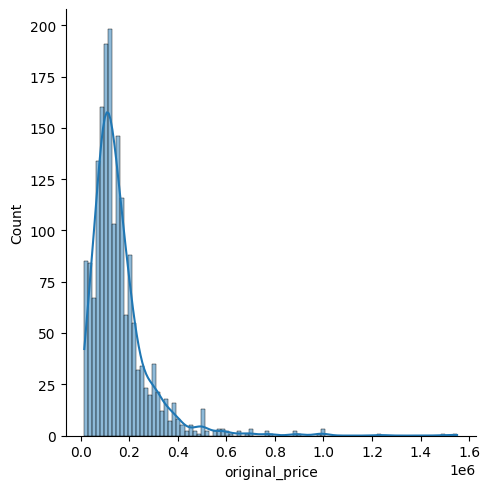

In [6]:
sns.displot(x=df['original_price'],kde=True)

**Looking at the chart:**
* It seems that most books are from a few thousand VND to 400k VND
* There are some more expensive books from 400k VND
* We will do plot some correlation between the prices and sales later on

<Axes: xlabel='original_price'>

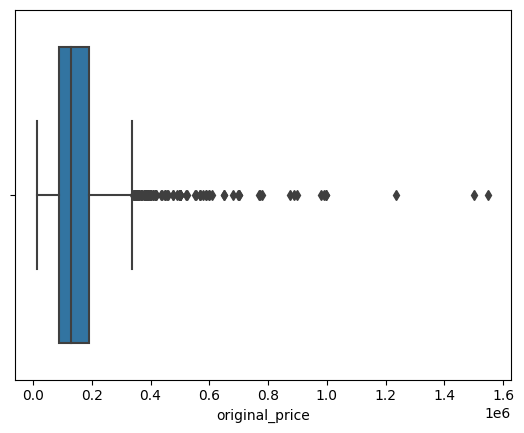

In [7]:
sns.boxplot(x=df['original_price'])

**From the box plot:**
* Usually, on average in Vietnam, books cost around 200000-300000 VND, so those that are not group close together in the outliers should be removed
* In this situation, there are 3 instances sparsely position over 1.2 million VND

In [8]:
df1 = df[df['original_price']<1200000]

<Axes: xlabel='original_price'>

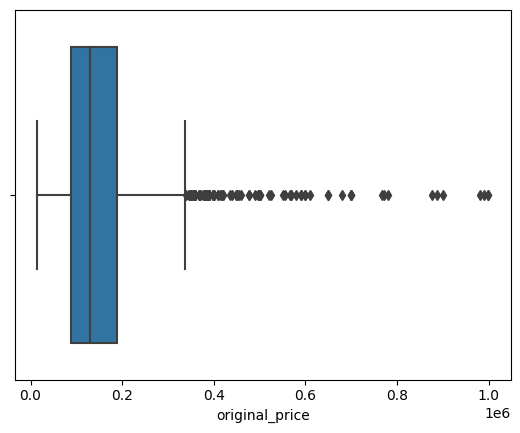

In [9]:
sns.boxplot(x=df1['original_price'])

**The box plot looks slightly better now, i will keep the rest in order to maintain data integrity**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


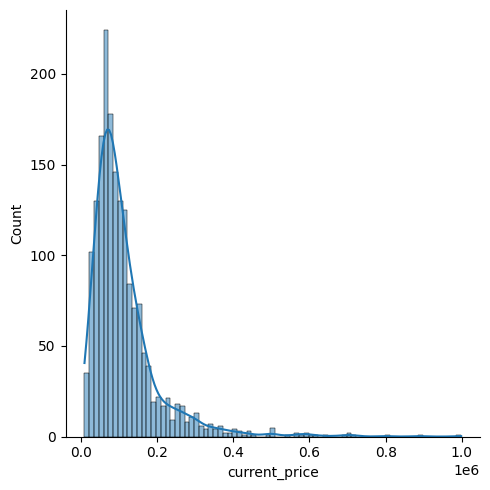

In [10]:
sns.displot(x=df1['current_price'],kde=True)

**From the graph:**
* It seems that prices have been dropping and expensive books decrease in amount
* The amount of books in the range of 0 to 400k VND increase in amount as well
* If we just look at books from 200k and below it follow a much more standard bell curve than the original price

<Axes: xlabel='current_price'>

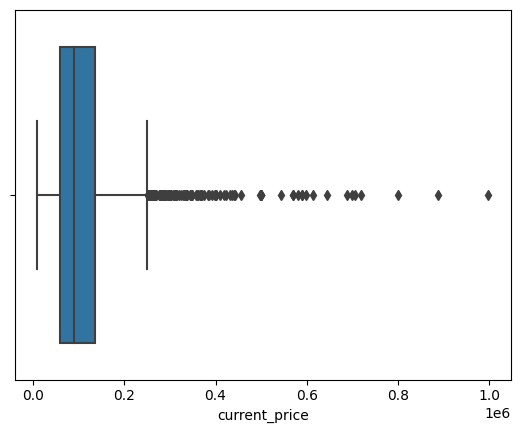

In [11]:
sns.boxplot(x=df1['current_price'])

**As i have mentioned:**
* As this is the current prices i will not mess with it any further

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


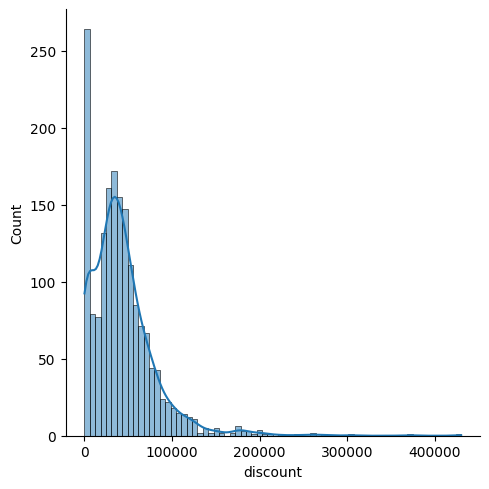

In [12]:
sns.displot(x=df1['discount'],kde=True)

**As can be seen:**
* A lot of books do not really have any discounts
* Those books that have discount mostly have discounts below 100k VND
* We will take a look at the relationship of sales and discount later on

<Axes: xlabel='discount'>

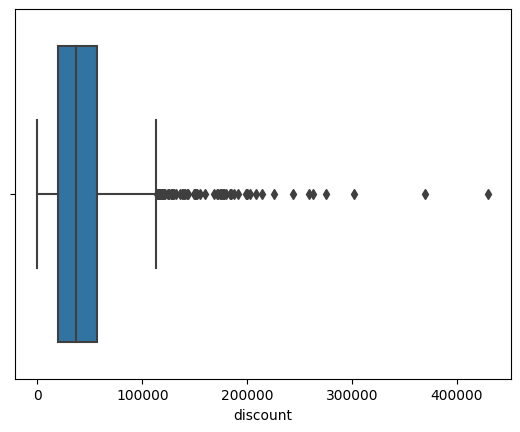

In [13]:
sns.boxplot(x=df1['discount'])

**Looking at the box plot:**
* Books tends to average from 200000-300000 so having a book discount of over 300000 is unusual

In [14]:
df1 = df1[df1['discount'] < 350000]

<Axes: xlabel='discount'>

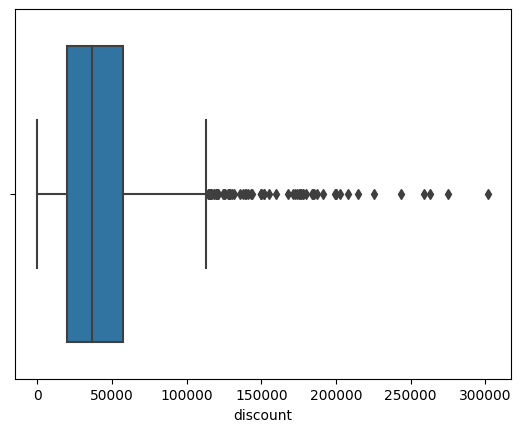

In [15]:
sns.boxplot(x=df1['discount'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


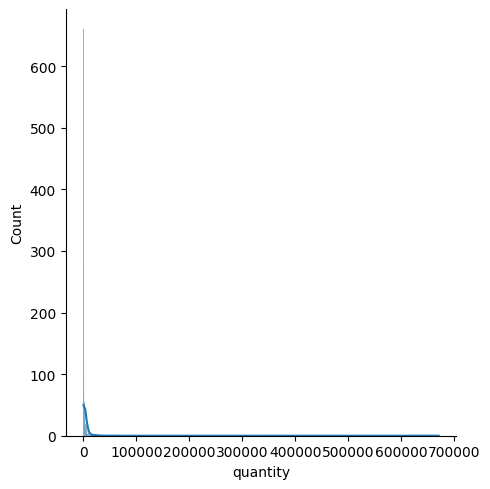

In [16]:
sns.displot(x=df1['quantity'],kde=True)

**From the chart:**
* It seems the distribution is too large, may be there are really popular books that sold a lot more than other
* From what we can see, it seems that most books sold under 100 thousands copies
* The difference between the max quantity is also significantly higher than the 75th percentile so there must be an outlier

<Axes: xlabel='quantity'>

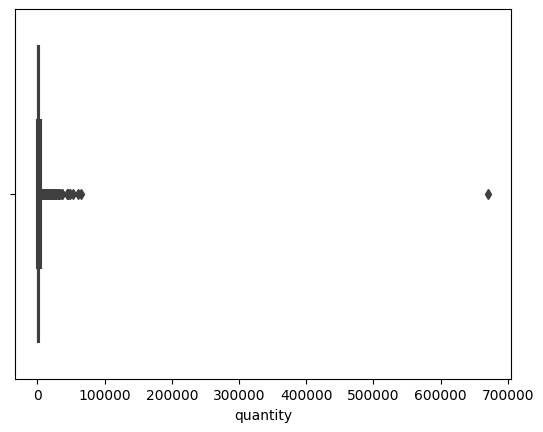

In [17]:
sns.boxplot(x=df1['quantity'])

In [18]:
df1[df1['quantity']>100000].head()

product_id                       title authors  original_price  \
121    75307228  OSHO - Yêu - Being In Love    Osho          168000   

     current_price  discount  discount_percent (%)  quantity  \
121         110800     57200              0.340476    671121   

                     category  n_review  avg_rating  pages  \
121  Sách nghệ thuật sống đẹp      1855         5.0    350   

                               manufacturer  
121  Nhà Xuất Bản Văn Hóa - Văn Nghệ TP.HCM

**It seems there is only this book with an extremely suspicious sales/review ratio so we will proceed to drop this instances**

In [19]:
df1 = df1[df1['quantity'] < 100000]
df1.head()

product_id                             title                    authors  \
0    74021317              Cây Cam Ngọt Của Tôi  José Mauro de Vasconcelos   
1   184466860   Hành Tinh Của Một Kẻ Nghĩ Nhiều       Nguyễn Đoàn Minh Thư   
2    73787185          Những Tù Nhân Của Địa Lý               Tim Marshall   
3    52789367        Nhà Giả Kim (Tái Bản 2020)               Paulo Coelho   
4   147920903  Một Thoáng Ta Rực Rỡ Ở Nhân Gian                Ocean Vuong   

   original_price  current_price  discount  discount_percent (%)  quantity  \
0          108000          64800     43200              0.400000     53075   
1           86000          59900     26100              0.303488      7929   
2          210000         126000     84000              0.400000     17896   
3           79000          47400     31600              0.400000     24668   
4          135000          81000     54000              0.400000     10000   

                     category  n_review  avg_rating  pages  \
0                 Tiểu Thuyết     11481         5.0    244   
1  Sách tư duy - Kỹ năng sống       780         4.8    184   
2               Lĩnh vực khác      3623         4.8    430   
3          Tác phẩm kinh điển      5131         5.0    228   
4                 Tiểu Thuyết      1636         4.8    304   

               manufacturer  
0  Nhà Xuất Bản Hội Nhà Văn  
1     Nhà Xuất Bản Thế Giới  
2  Nhà Xuất Bản Hội Nhà Văn  
3       Nhà Xuất Bản Hà Nội  
4  Nhà Xuất Bản Hội Nhà Văn

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


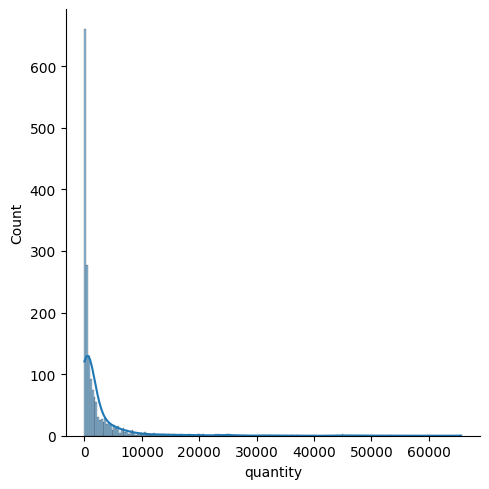

In [20]:
sns.displot(x=df1['quantity'],kde=True)

<Axes: xlabel='quantity'>

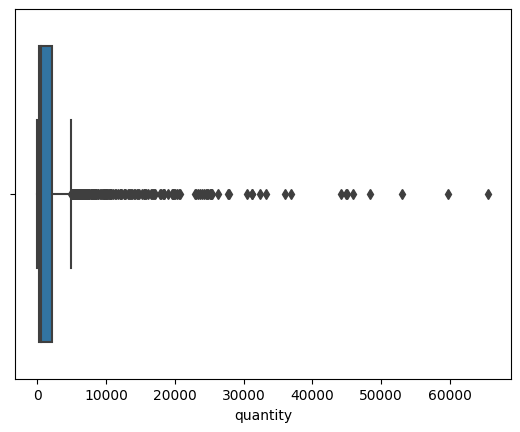

In [21]:
sns.boxplot(x=df1['quantity'])

**Both the distribution and box plot have become easier to read and with regards to sales it is not uncommon to see these kinds of differences in sales**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


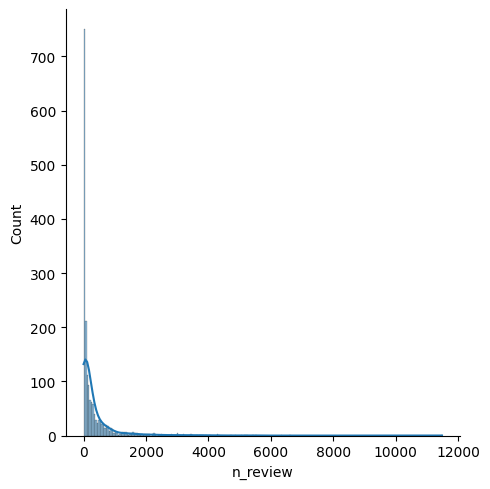

In [22]:
sns.displot(x=df1['n_review'],kde=True)

**It seems that:**
* A lot of books have really little reviews
* Most of the books have under 2000
* The minority of books have over 2000 reviews

<Axes: xlabel='n_review'>

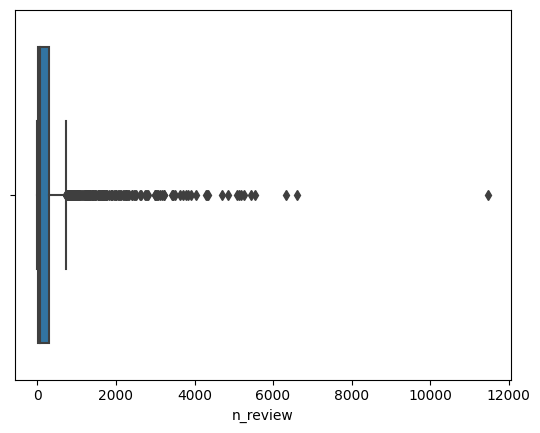

In [23]:
sns.boxplot(x=df1['n_review'])

**As you can see:**
* There is a huge outliers almost doubling the second highest outliers and it is not grouped tightly
* I will proceed to drop this single instances

In [24]:
df1 = df1[df1['n_review']<10000]

<Axes: xlabel='n_review'>

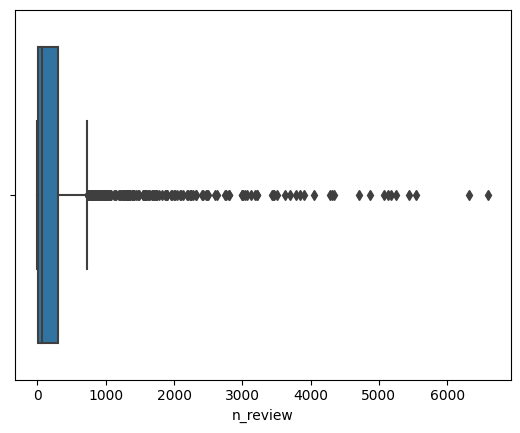

In [25]:
sns.boxplot(x=df1['n_review'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


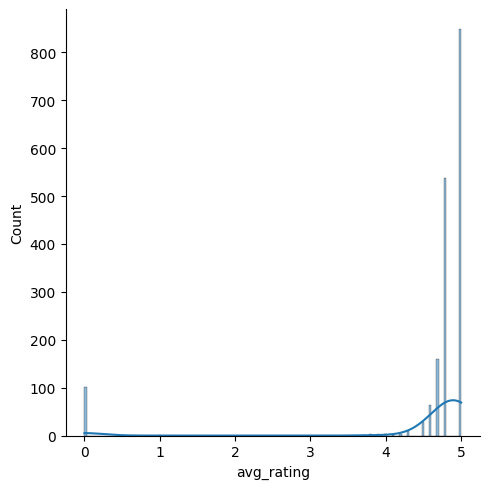

In [26]:
sns.displot(df1['avg_rating'],kde=True)

**Looking at the graph:**
* Books either have average rating of 0 or around 3,5 and above
* Most books that have ratings are all 4,6 and above in rating score

<Axes: xlabel='avg_rating'>

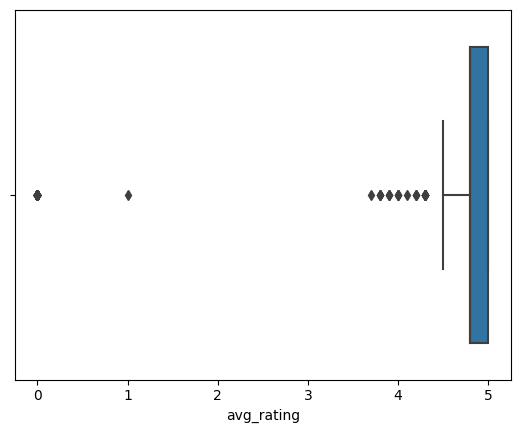

In [27]:
sns.boxplot(x=df1['avg_rating'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


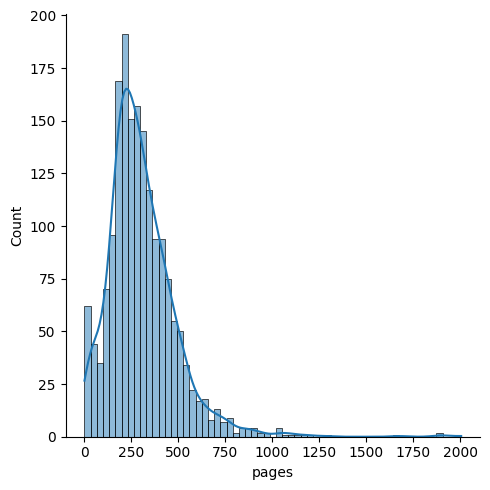

In [28]:
sns.displot(df1['pages'],kde=True)

**Looking at the graph:**
* It seems that my speculation was right, the average pages length is from abbout 200-500 pages and anything above that would be consider long
* Later on, we will be diving into pages relation with regards to other variables

<Axes: xlabel='pages'>

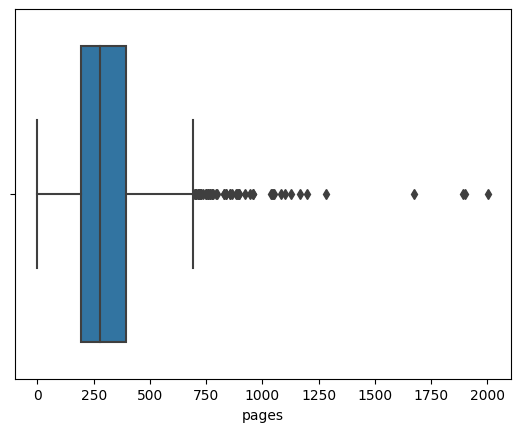

In [29]:
sns.boxplot(x=df1['pages'])

**From the plot:**
* Most book have below 750 pages, the longest books in the world only has 1731 pages so it is safe to assume there would be no books over 1500 to get rid of the outilers

In [30]:
df1 = df1[df1['pages']<1500]

<Axes: xlabel='pages'>

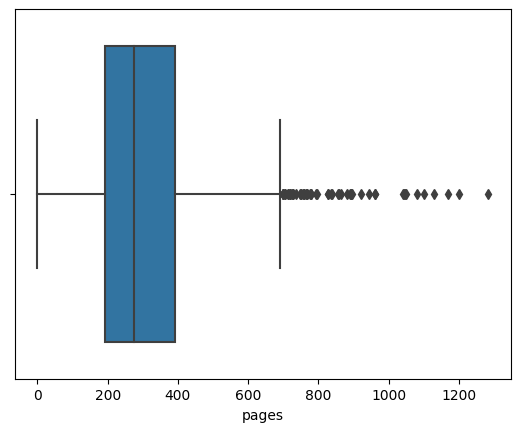

In [31]:
sns.boxplot(x=df1['pages'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Count', ylabel='category'>

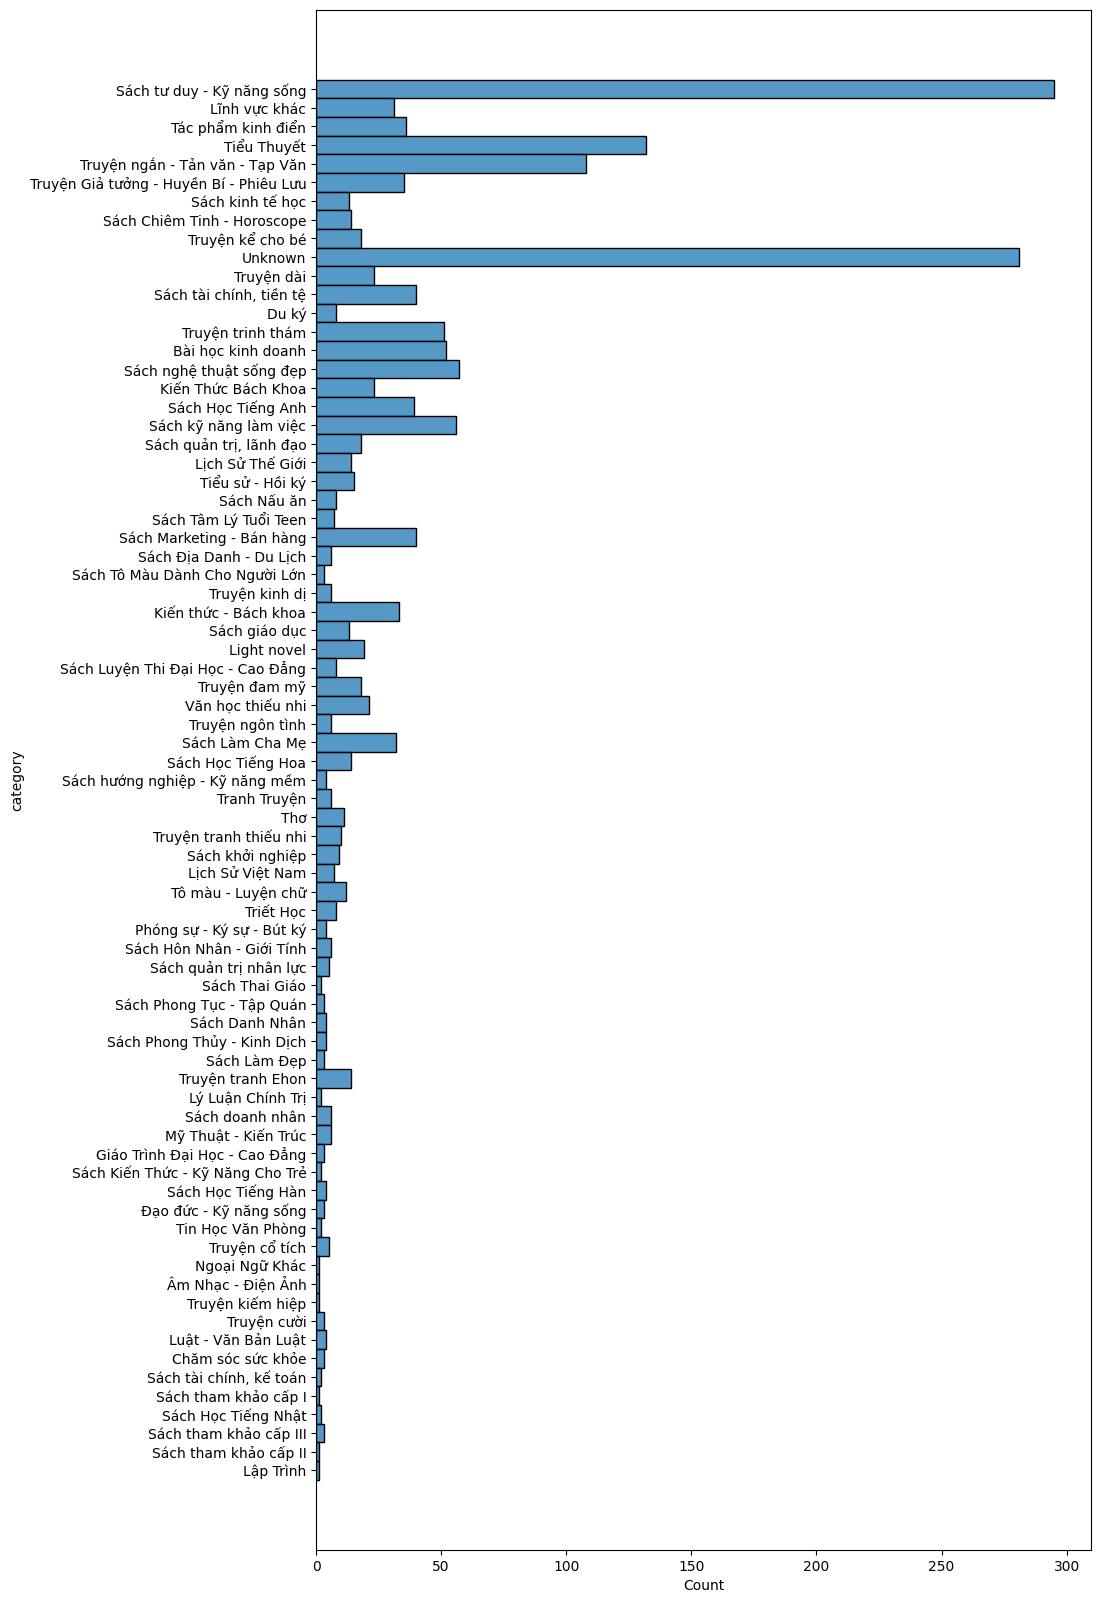

In [32]:
fig, ax = plt.subplots(figsize=(10,20))
sns.histplot(y=df1['category'])

**From the graph:**
* The amount of 'Sach tu duy - ky nang song', novel and short stories is available in a higher amount than other books so we can expect the sales of these books to be higher as well
* It seems that there is also the unknown categories, i will make the assumptions that the author can not decide which categories for those books

In [33]:
print("Number of unique values:",df1['title'].nunique())
print(df1['title'].unique())

Number of unique values: 1752
['Hành Tinh Của Một Kẻ Nghĩ Nhiều' 'Những Tù Nhân Của Địa Lý'
 'Nhà Giả Kim (Tái Bản 2020)' ...
 'Để Con Được Chích - Hiểu Hết Về Vắc Xin Và Miễn Dịch'
 'Nhà Lãnh Đạo 360 Độ (Tái Bản)'
 'The Best of Chicken Soup - Tuyển Tập Những Câu Chuyện Hay Nhất (SN)(Tái Bản 2020)']


**We have 1761 rows but we only have 1752 unique values so there might be duplicate rows**

In [34]:
df1[df1.duplicated(subset=['title'])]

product_id                                              title  \
328    205227772     1111 - Nhật Ký Sáu Vạn Dặm Trên Yên Xe Cà Tàng   
1162   205279963     1111 - Nhật Ký Sáu Vạn Dặm Trên Yên Xe Cà Tàng   
1254   199709625                               Ngược Dòng Tiền Kiếp   
1370     8011021                    Tâm Lý Học Thành Công (Tái Bản)   
1385     2253993    7 Chiến Lược Thịnh Vượng Và Hạnh Phúc (Tái Bản)   
1442   196411147  Phượng Hoàng Tái Sinh - 12 Phẩm Chất Quan Trọn...   
1511   182149648  Nước Ép Trị Liệu Và Chế Độ Ăn Theo Phương Pháp...   
1565    85923342  Minh Triết Trong Ăn Uống Của Phương Đông (Tái ...   
1714   197337637                     Trí Tuệ Do Thái (Tái Bản 2022)   

                  authors  original_price  current_price  discount  \
328        Trần Đặng Đăng          325000         292500     32500   
1162  Trần Đặng Đăng Khoa          258000         258000         0   
1254              Unknown          182000         155000     27000   
1370       Carol S. Dweck          199000         129350     69650   
1385             Jim Rohn           85000          72000     13000   
1442          Brian Tracy          152000         152000         0   
1511            Emma Phạm          199000         133900     65100   
1565        Ngô Đức Vượng          138000          91000     47000   
1714            Eran Katz          189000         161000     28000   

      discount_percent (%)  quantity                    category  n_review  \
328               0.100000       566     Sách Địa Danh - Du Lịch         0   
1162              0.000000         8                       Du ký         0   
1254              0.148352       566                     Unknown         0   
1370              0.350000       548  Sách tư duy - Kỹ năng sống        85   
1385              0.152941       566       Sách kỹ năng làm việc         0   
1442              0.000000       566  Sách tư duy - Kỹ năng sống         0   
1511              0.327136       378                     Unknown        33   
1565              0.340580       512  Sách tư duy - Kỹ năng sống        62   
1714              0.148148       566  Sách tư duy - Kỹ năng sống         0   

      avg_rating  pages                  manufacturer  
328          0.0     13                       NXB Trẻ  
1162         0.0    778                       NXB Trẻ  
1254         0.0     70       Nhà Xuất Bản Thanh Niên  
1370         5.0    480         Nhà Xuất Bản Lao Động  
1385         0.0    220         Nhà Xuất Bản Thế Giới  
1442         0.0     66         Nhà Xuất Bản Hồng Đức  
1511         5.0    197         Nhà Xuất Bản Thế Giới  
1565         4.7    128  Nhà Xuất Bản Tổng hợp TP.HCM  
1714         0.0    181      Nhà Xuất Bản Công Thương

**Looking at each values:**
* They have different product_id
* They all have different authors

**So we can keep these rows in our dataset**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Count', ylabel='manufacturer'>

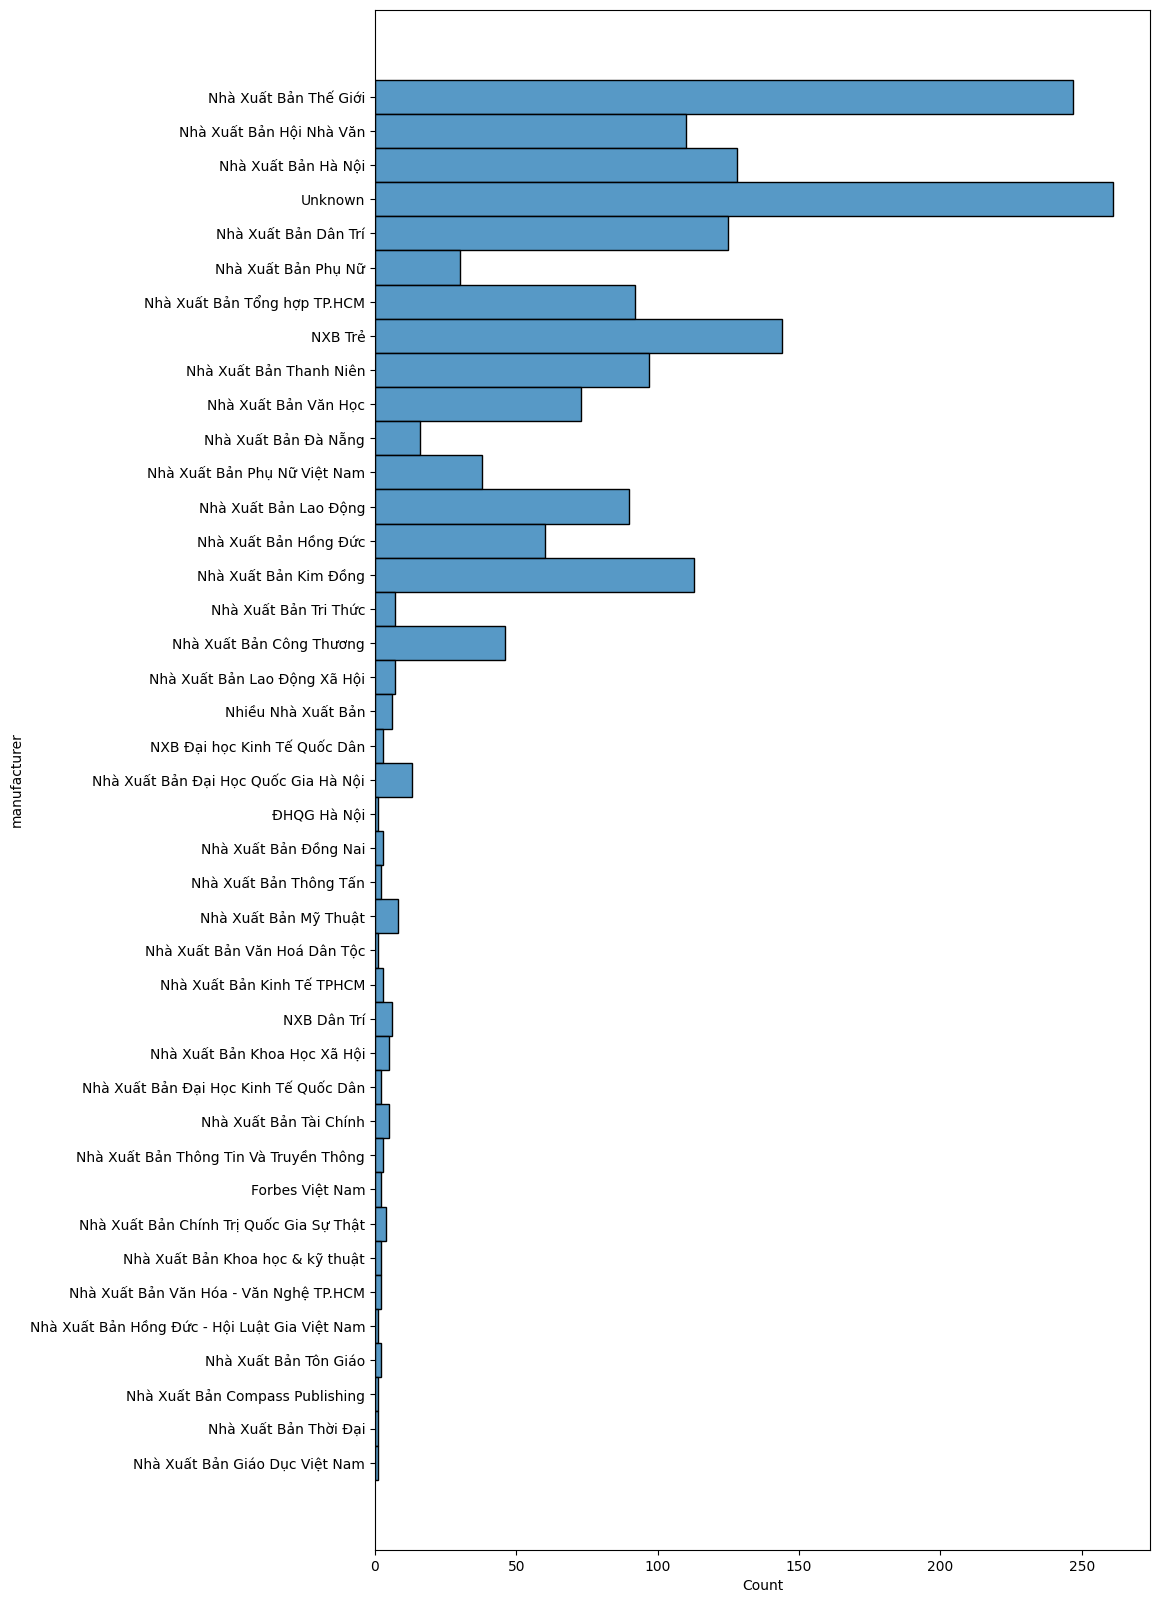

In [35]:
fig, ax = plt.subplots(figsize=(10,20))
sns.histplot(y=df1['manufacturer'])

**Looking at the manufacturer:**
* The distribution of amount is quite even between big publisher witht the exception of 'NXB The Gioi' and unknown publisher
* Most of the other publisher is not necessarily small but they are niche in book publishing

In [36]:
print("Number of unique values:",df1['product_id'].nunique())

Number of unique values: 1761


**With this, we can conclude that all books are distinct**

**Now we can start investigate multiple variables at the same time:**

<Axes: xlabel='original_price', ylabel='quantity'>

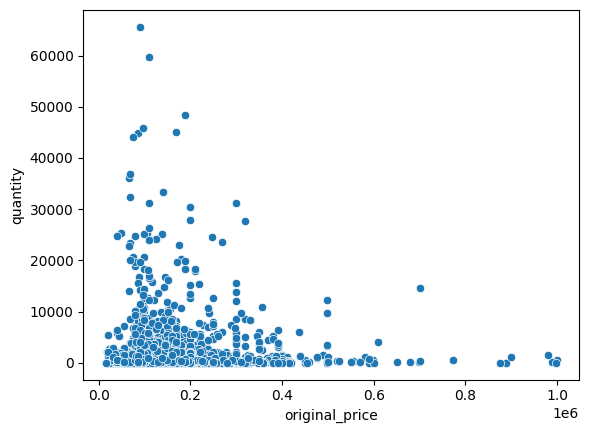

In [37]:
sns.scatterplot(x=df1['original_price'],y=df1['quantity'])

**From chart it is safe to assume:**
* Based on the spread of the scatter, the original price should have little to no correlation to the value we are trying to predict quantity
* To be more assured, let's calcualte the spearman coefficient

In [38]:
stats.spearmanr(df['original_price'],df['quantity'])

SignificanceResult(statistic=0.054762031357075726, pvalue=0.0211487634270696)

**The result is only 0.05 which is a very weak correlation so it can be consider not relevant in our prediction**

<Axes: xlabel='current_price', ylabel='quantity'>

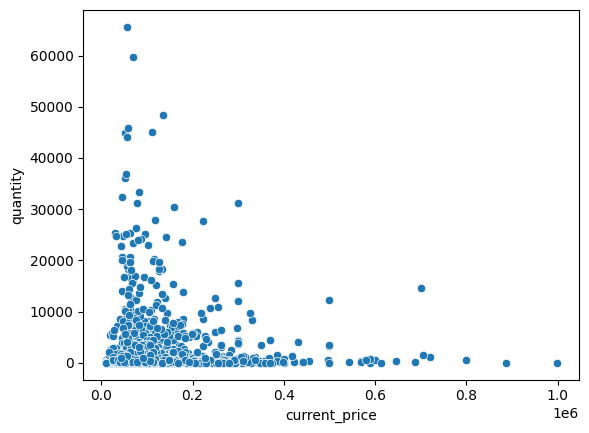

In [39]:
sns.scatterplot(x=df1['current_price'],y=df1['quantity'])

**Because the current price is deducted to form the current price it is safe to assume that the result is the same**

In [40]:
stats.spearmanr(df1['current_price'],df1['quantity'])

SignificanceResult(statistic=-0.008130269442566234, pvalue=0.733145586818663)

**As expected, it is an even worse correlation to quantity sales**

<Axes: xlabel='discount', ylabel='quantity'>

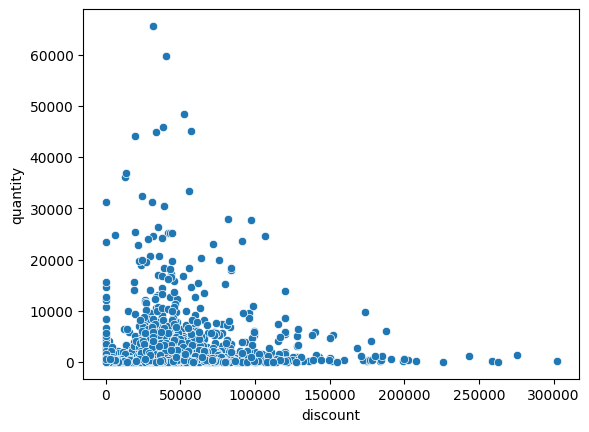

In [41]:
sns.scatterplot(x=df1['discount'],y=df1['quantity'])

**From the chart:**
* Based on the spread of the scatter, discount may have a slight correlation to quantity which makes perfect sense, the cheaper the book the more the sales.
* To be more assured, let's calcualte the spearman coefficient

In [42]:
stats.spearmanr(df1['discount'],df1['quantity'])

SignificanceResult(statistic=0.18912882441820245, pvalue=1.210773547941135e-15)

**The result is only 0.189, which is not too high but if we dont find any variable we will have to make do with this variable in our prediction model**

<Axes: xlabel='n_review', ylabel='quantity'>

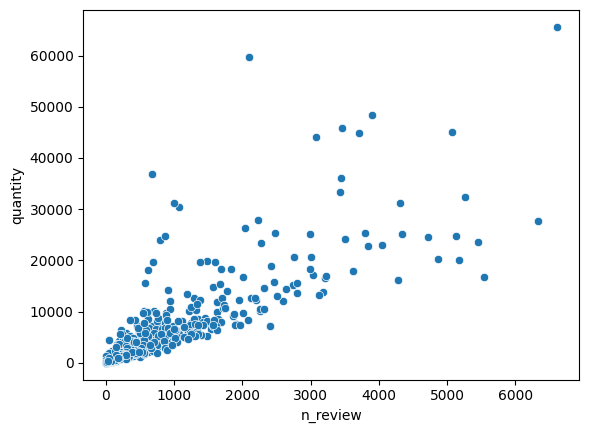

In [43]:
sns.scatterplot(x=df1['n_review'],y=df1['quantity'])

**From the chart:**
* Based on the spread of the scatter, n-review seems to follow an almost linear correlation with quantity sales which is reasonable as the more the sales the more reviews the books will have
* To be more assured, let's calcualte the spearman coefficient

In [44]:
stats.spearmanr(df1['n_review'],df1['quantity'])

SignificanceResult(statistic=0.9332314250280365, pvalue=0.0)

**The result is 0.93 which is the highest we have seen so far and personally i do not think there will be any variables that are higher**

<Axes: xlabel='avg_rating', ylabel='quantity'>

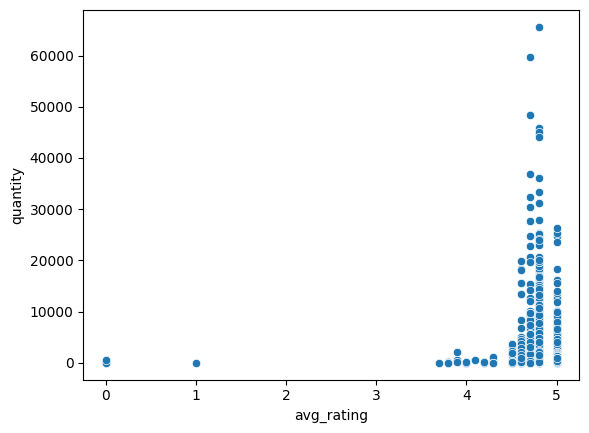

In [45]:
sns.scatterplot(x=df1['avg_rating'],y=df1['quantity'])

**From the chart:**
* Based on the spread of the scatter, avg_rating looks to have no relation to sales which is surprising
* To be more assured, let's calcualte the spearman coefficient

In [46]:
stats.spearmanr(df1['avg_rating'],df1['quantity'])

SignificanceResult(statistic=-0.13057440424938888, pvalue=3.816756595221322e-08)

**The result is only a mere -0.13**

<Axes: xlabel='pages', ylabel='quantity'>

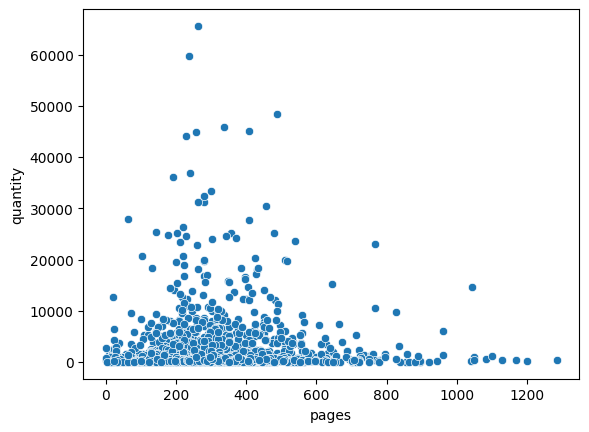

In [47]:
sns.scatterplot(x=df1['pages'],y=df1['quantity'])

**From the chart:**
* The spread of points is all over the place so pages should also not be of significance when predicting quantity sales
* To be more assured, let's calcualte the spearman coefficient

In [48]:
stats.spearmanr(df1['pages'],df1['quantity'])

SignificanceResult(statistic=0.11704095530902343, pvalue=8.436645154209624e-07)

**The result is a positive 0.11 which is small but if we need multiple variable it is an acceptable independent variables**

**In conlusion, these variables have some correlation to quantity sales:**
* pages
* discount
* n_review

**Let's now move on to finding the relationships between different variables to each other to see if there is anything interesting**

<Axes: xlabel='n_review', ylabel='discount'>

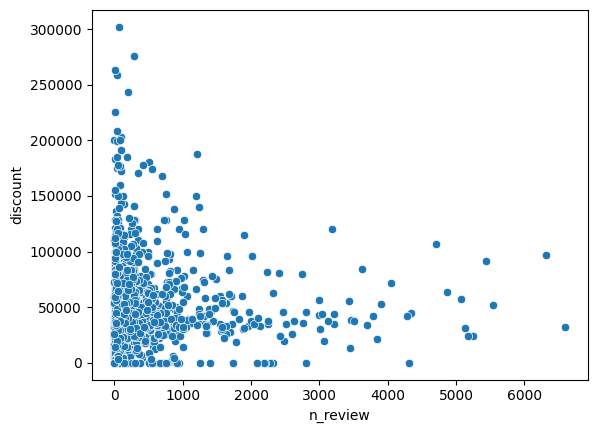

In [49]:
sns.scatterplot(x=df1['n_review'],y=df1['discount'])

**Looking at the chart:**
* Most discount seems to happen when the number of reviews is less than 2000
* This may suggest there is a slight correlation between these 2 variables

In [50]:
stats.spearmanr(df1['n_review'],df1['discount'])

SignificanceResult(statistic=0.2490644137733704, pvalue=2.6194267651019873e-26)

<Axes: xlabel='pages', ylabel='original_price'>

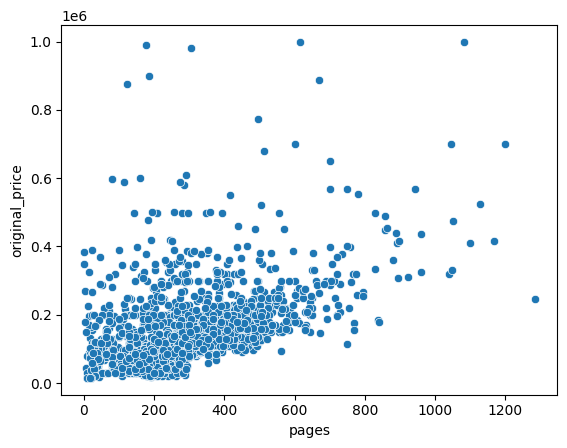

In [53]:
sns.scatterplot(x=df1['pages'],y=df1['original_price'])

**From the scatter plot:**
* It seems that the relation between original price and pages seems to be linear
* The more pages a book have the higher the prices which is reasonable to expect

In [54]:
stats.spearmanr(df1['pages'],df1['original_price'])

SignificanceResult(statistic=0.5509671505521244, pvalue=2.244619927723018e-140)

<Axes: xlabel='quantity', ylabel='category'>

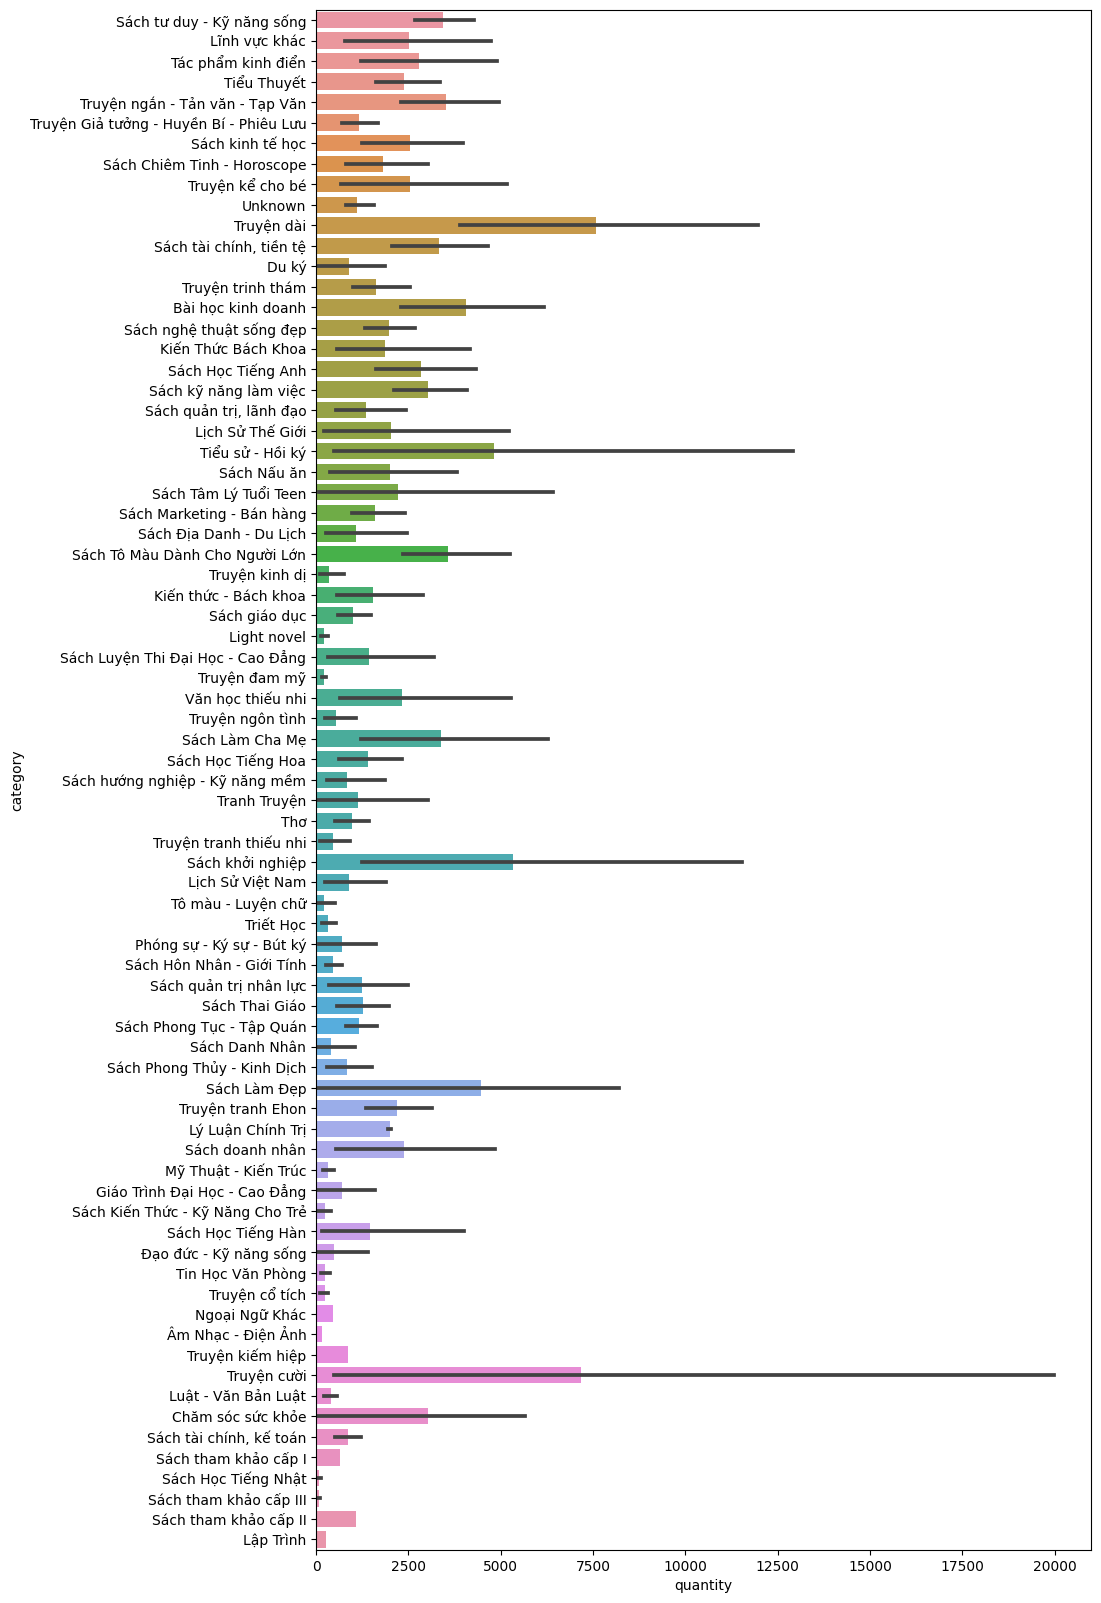

In [57]:
fig, ax = plt.subplots(figsize=(10,20))
sns.barplot(x=df1['quantity'],y=df1['category'])

* Even though we have established that there are many skill book but the highest selling categories are all different genres of novel
* The second best selling categories seems to be book pertaining to self help like beauty, health, entrepreneur

<Axes: xlabel='discount', ylabel='category'>

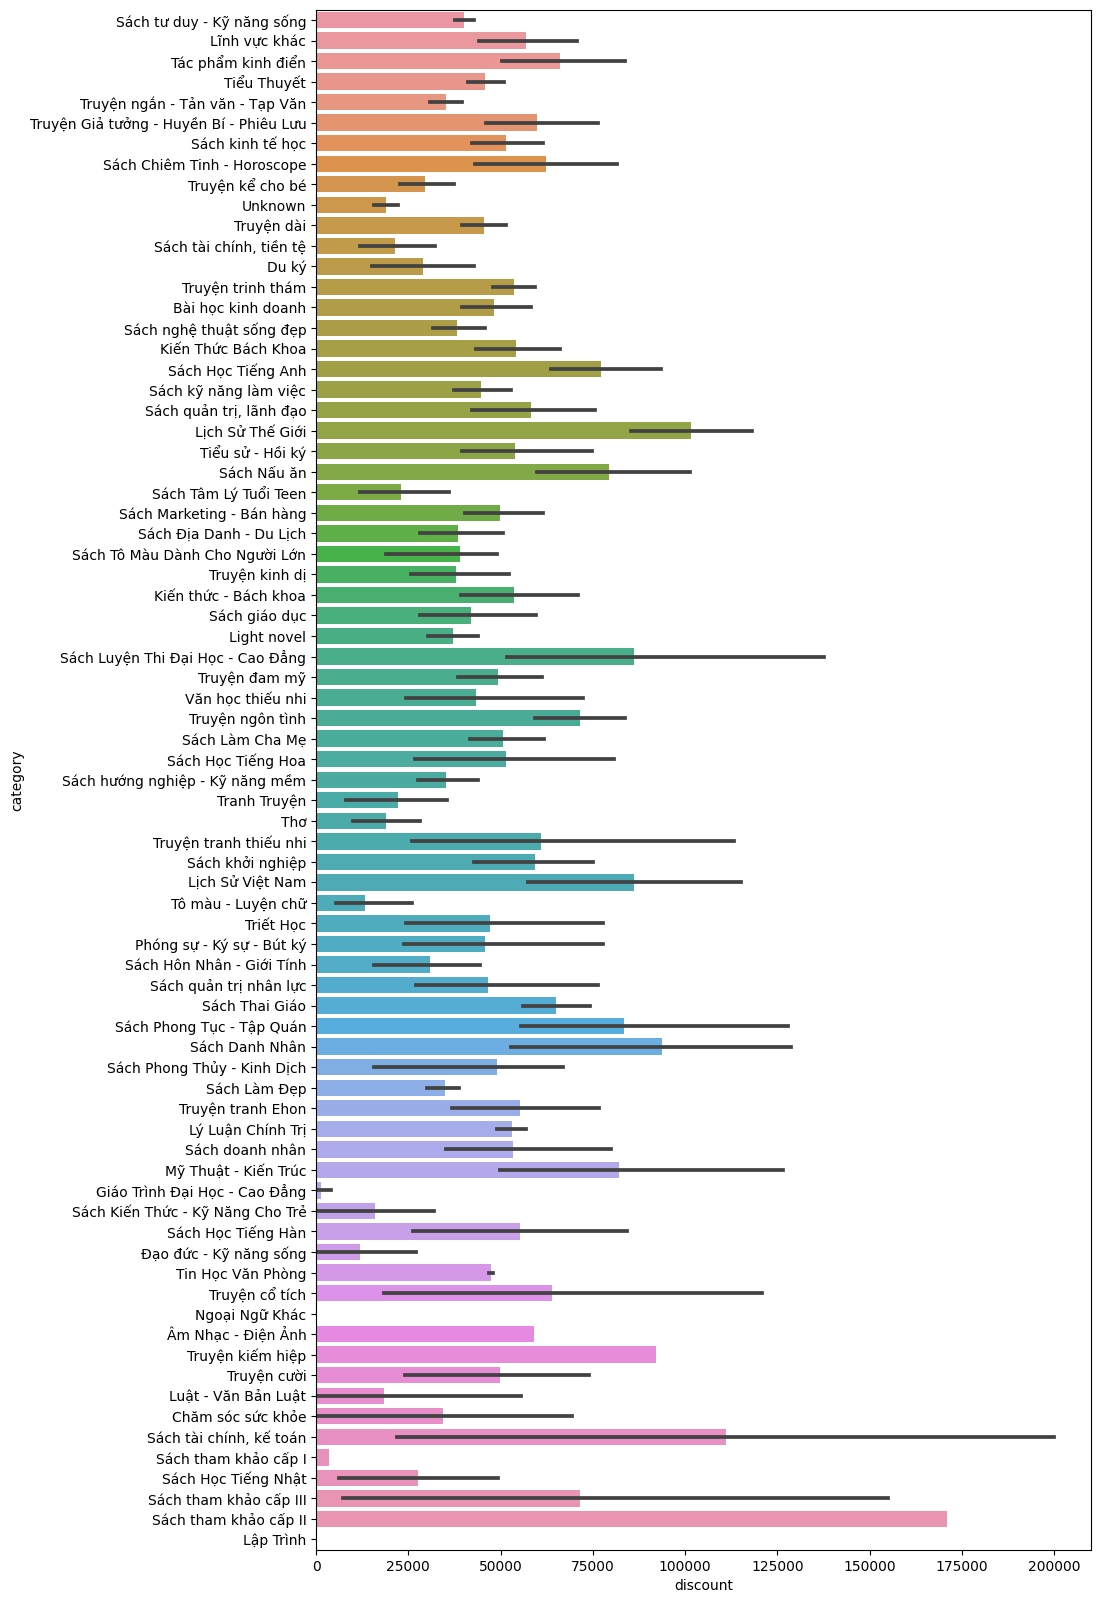

In [58]:
fig, ax = plt.subplots(figsize=(10,20))
sns.barplot(x=df1['discount'],y=df1['category'])

**From the bar chart:**
* Most of the largest discount happen to education books while novels only have a small decrease in price
* Especially books for primary education seems to be of the most discounted

<Axes: xlabel='n_review', ylabel='category'>

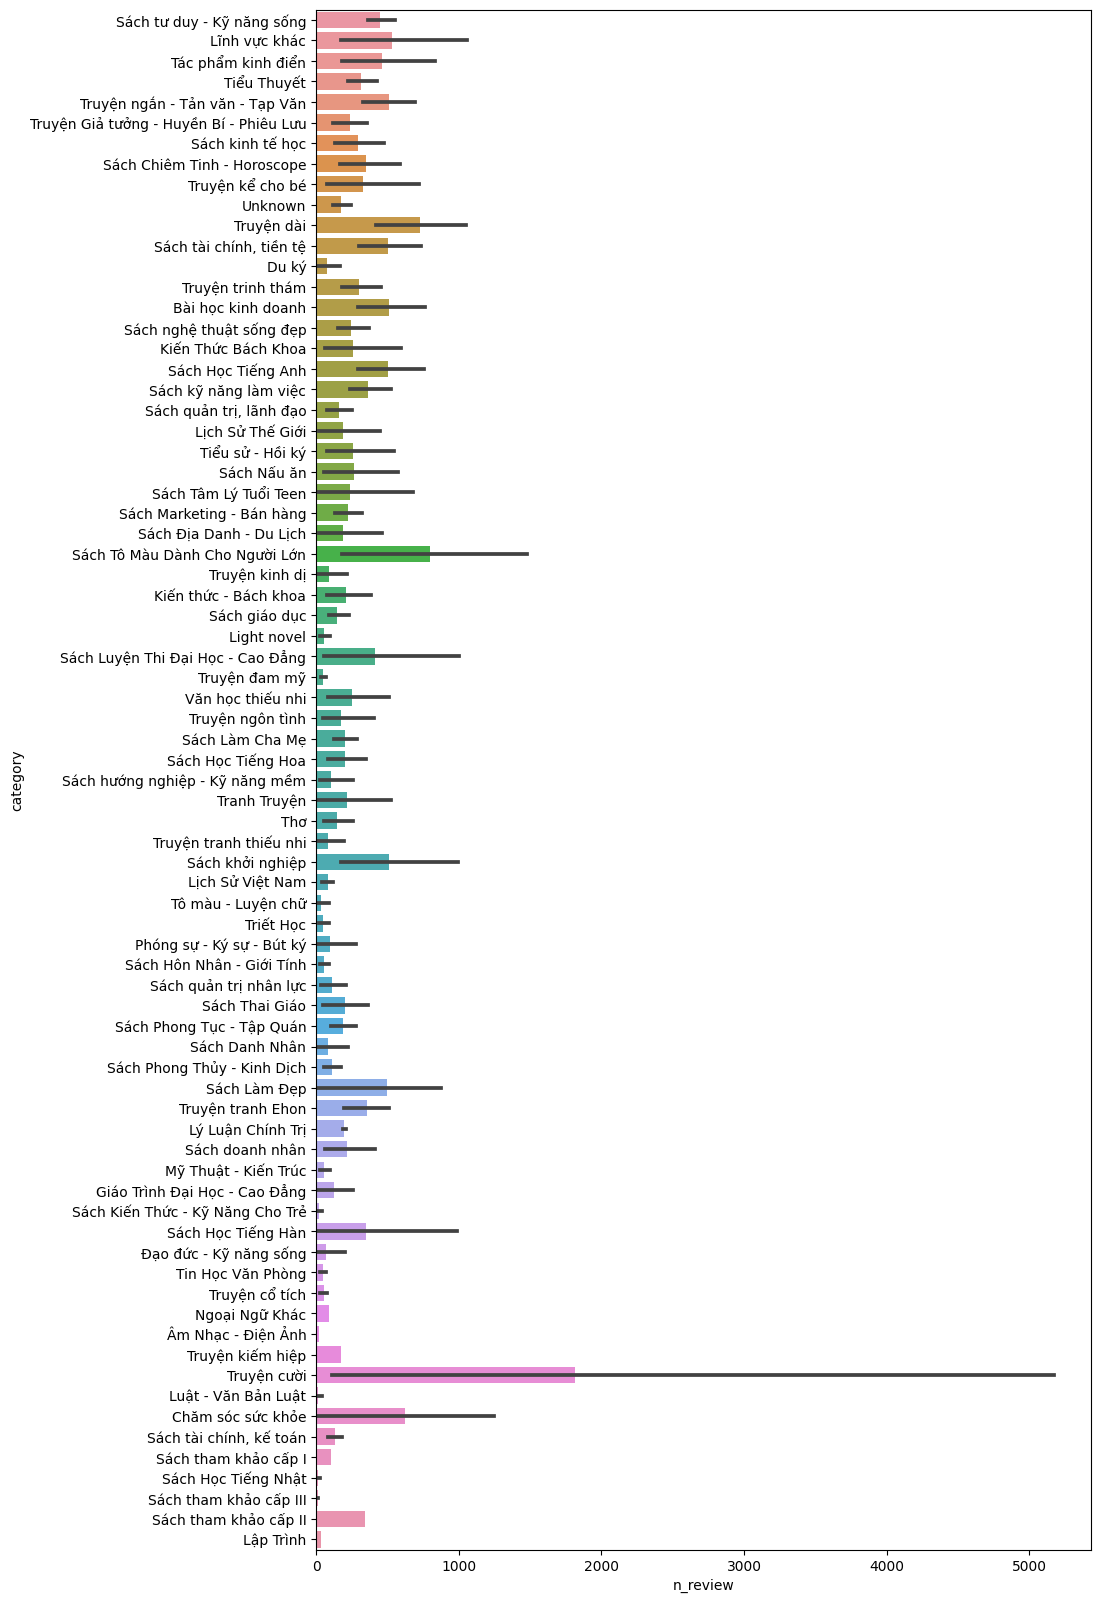

In [59]:
fig, ax = plt.subplots(figsize=(10,20))
sns.barplot(x=df1['n_review'],y=df1['category'])

**From the bar chart:**
* As expected, the best sellings categories is also the most reviewed
* It also seems that educational books have very little reviews

<Axes: xlabel='pages', ylabel='category'>

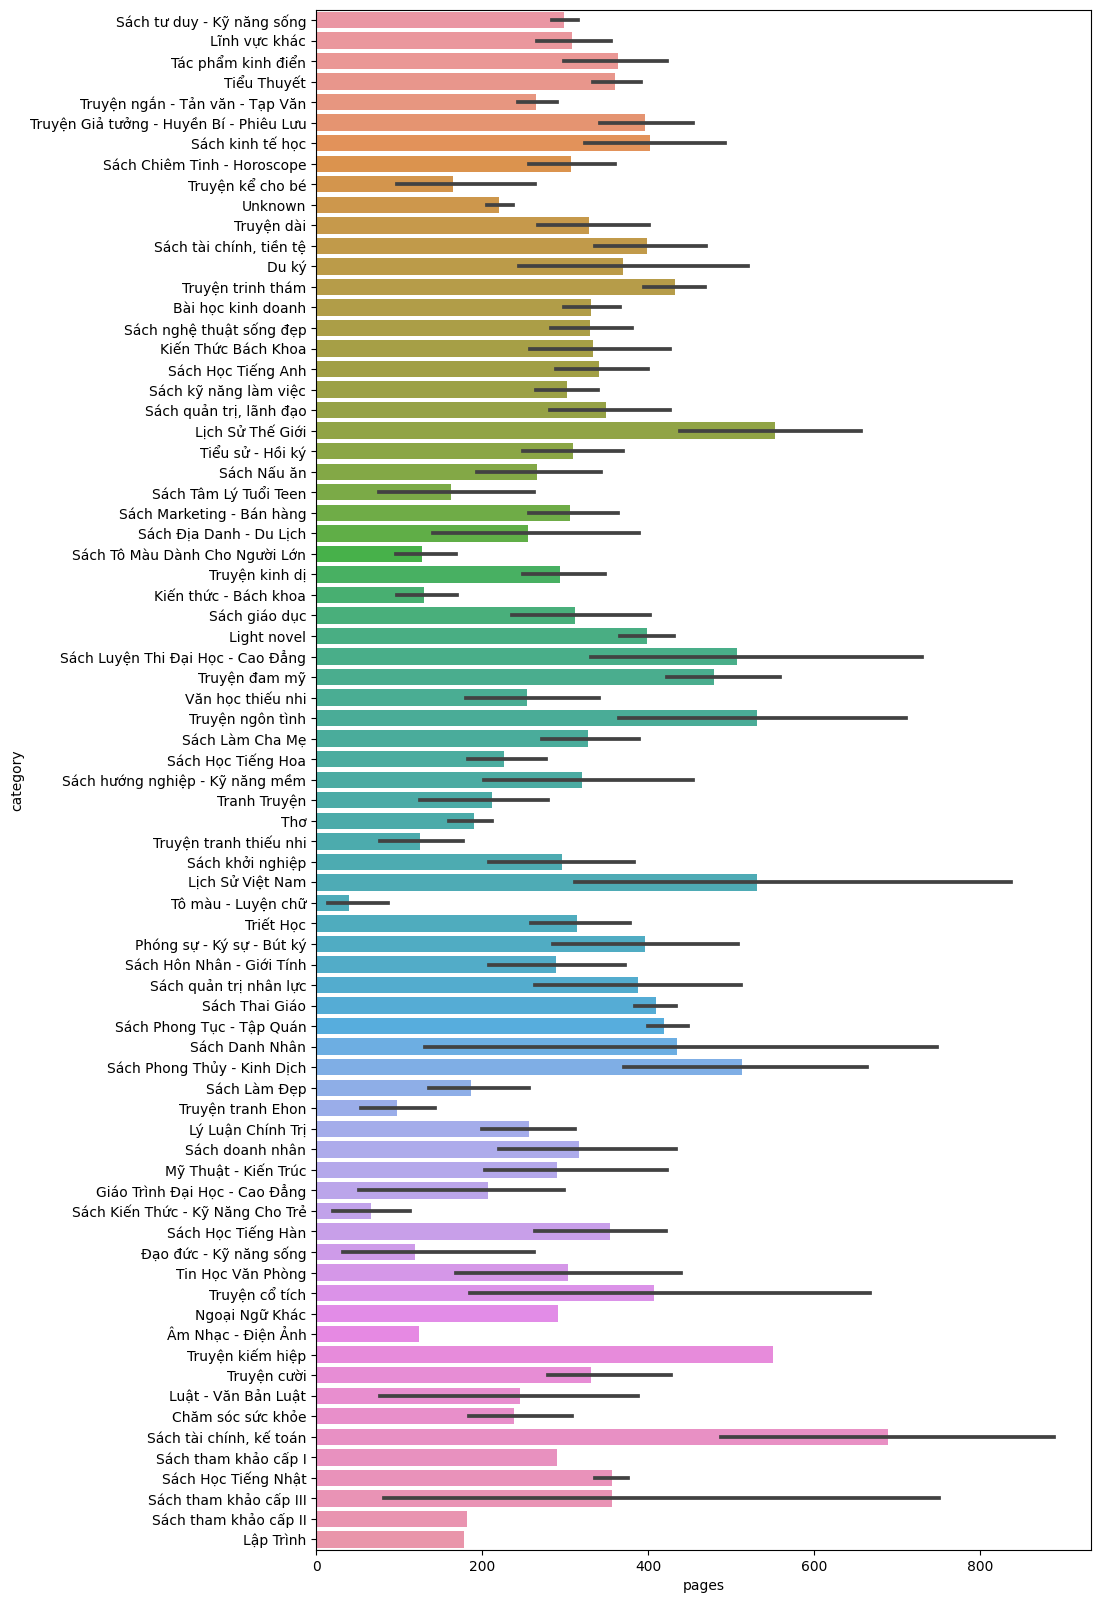

In [61]:
fig, ax = plt.subplots(figsize=(10,20))
sns.barplot(x=df1['pages'],y=df1['category'])

**From the bar chart:**
* Educational books seems to have high amount of pages
* The best selling books categories also fits in the average of book pages

<Axes: xlabel='quantity', ylabel='manufacturer'>

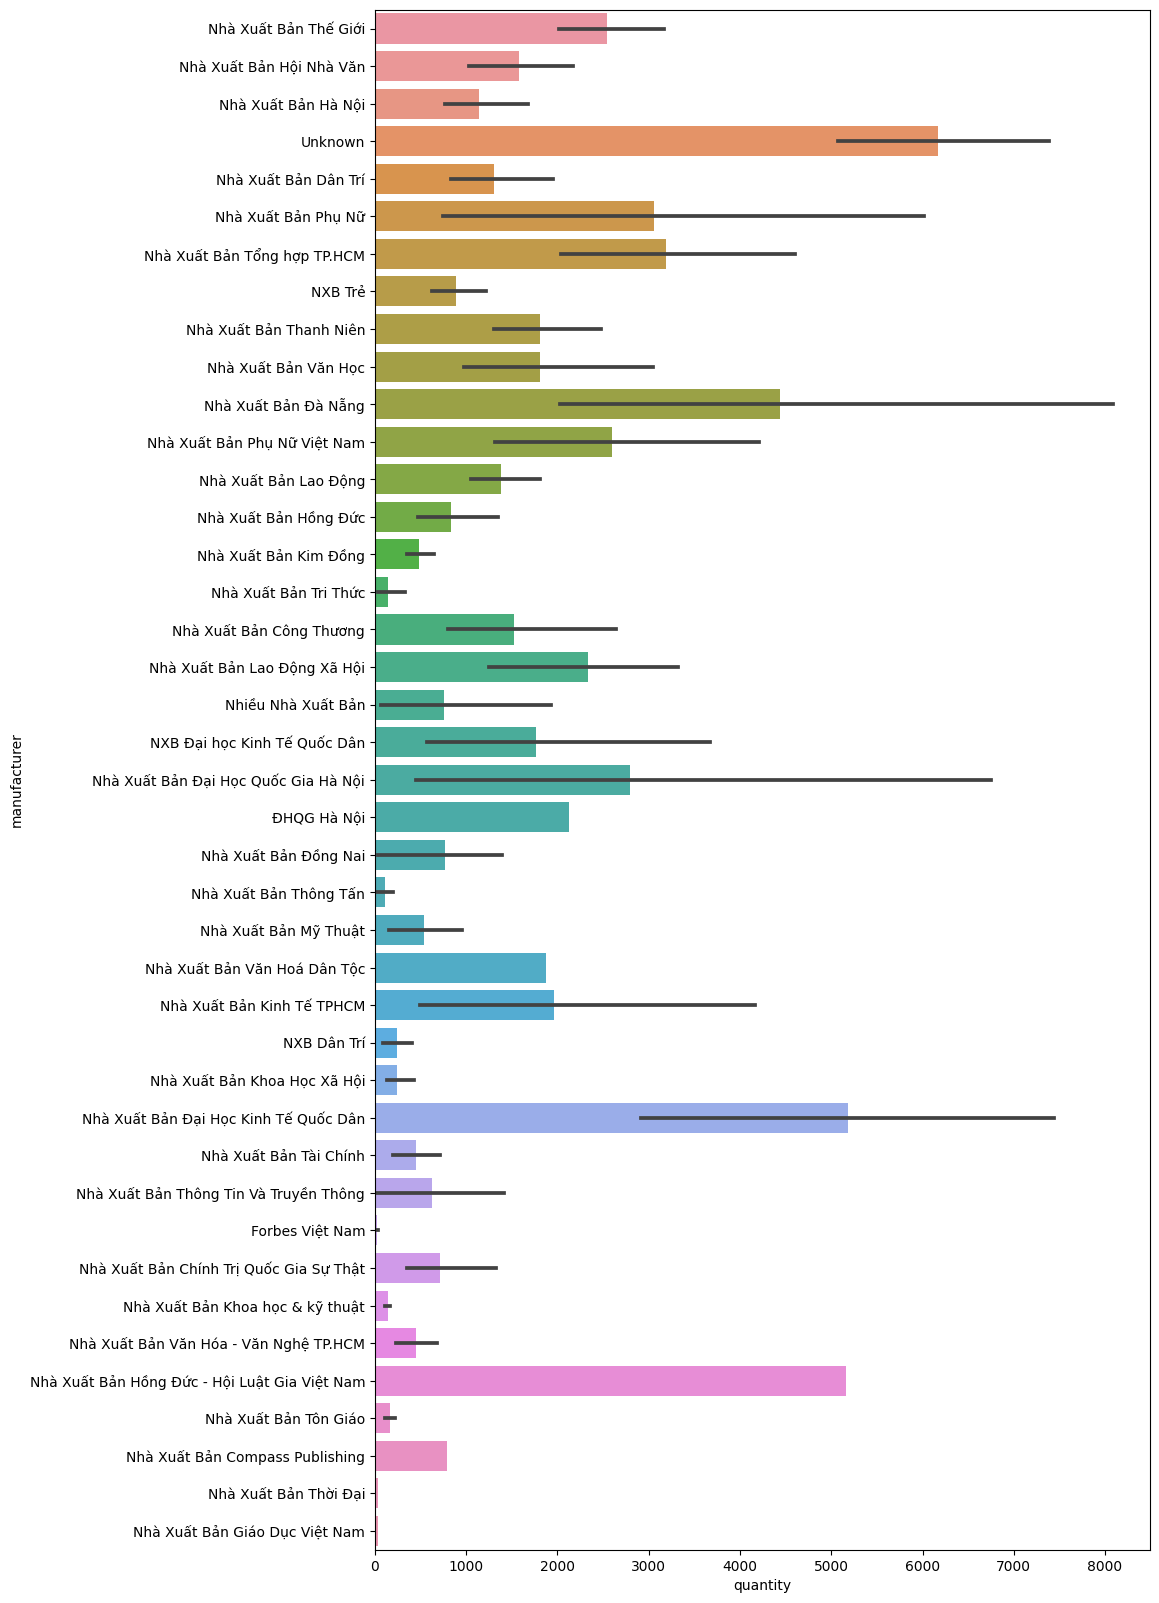

In [62]:
fig, ax = plt.subplots(figsize=(10,20))
sns.barplot(x=df1['quantity'],y=df1['manufacturer'])

**From the bar chart:**
* It is very surprising that the book sales of large publisher is obscured by an university publisher with the exception of Hong Duc
* Even though the sale of big publisher is not what i expected but they still takes up a large percent of the sales with a fairly even distribution

<Axes: xlabel='discount', ylabel='manufacturer'>

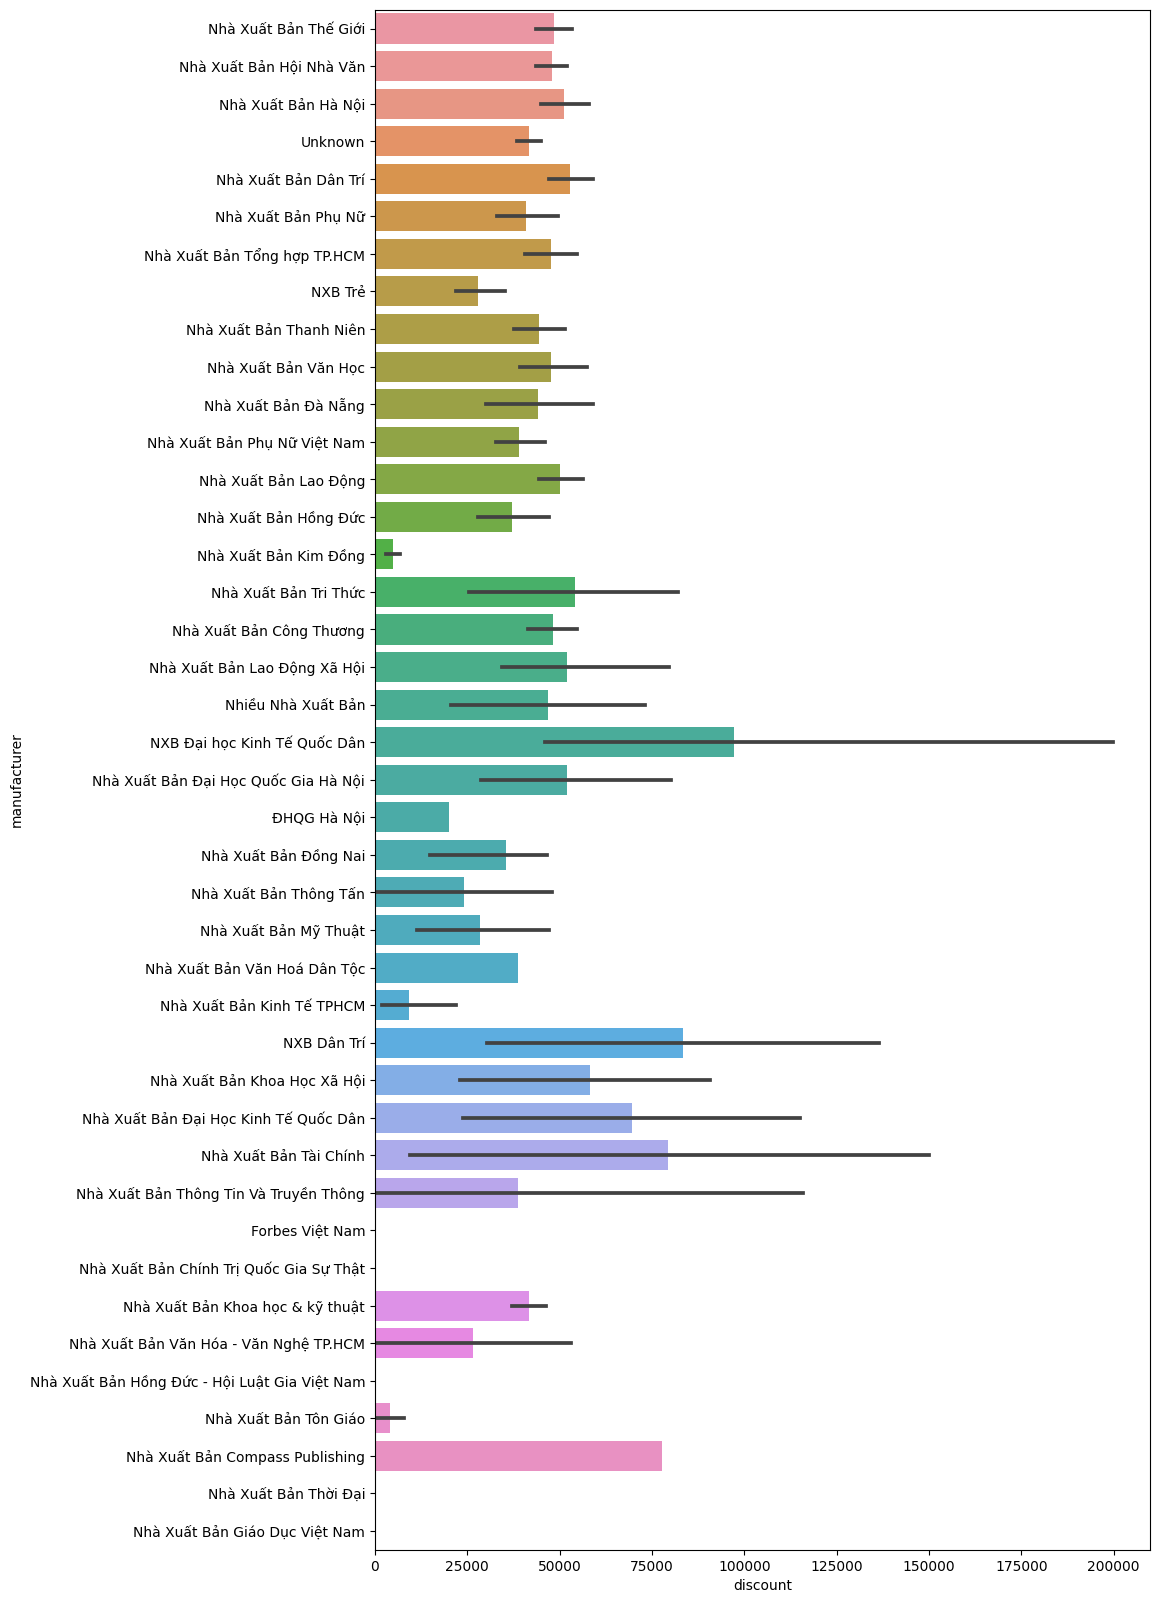

In [63]:
fig, ax = plt.subplots(figsize=(10,20))
sns.barplot(x=df1['discount'],y=df1['manufacturer'])

**From the bar chart:**
* It seems that the best selling publisher also have the highest discount rate
* Could this be the reason for their sales of books being the highest ?

<Axes: xlabel='n_review', ylabel='manufacturer'>

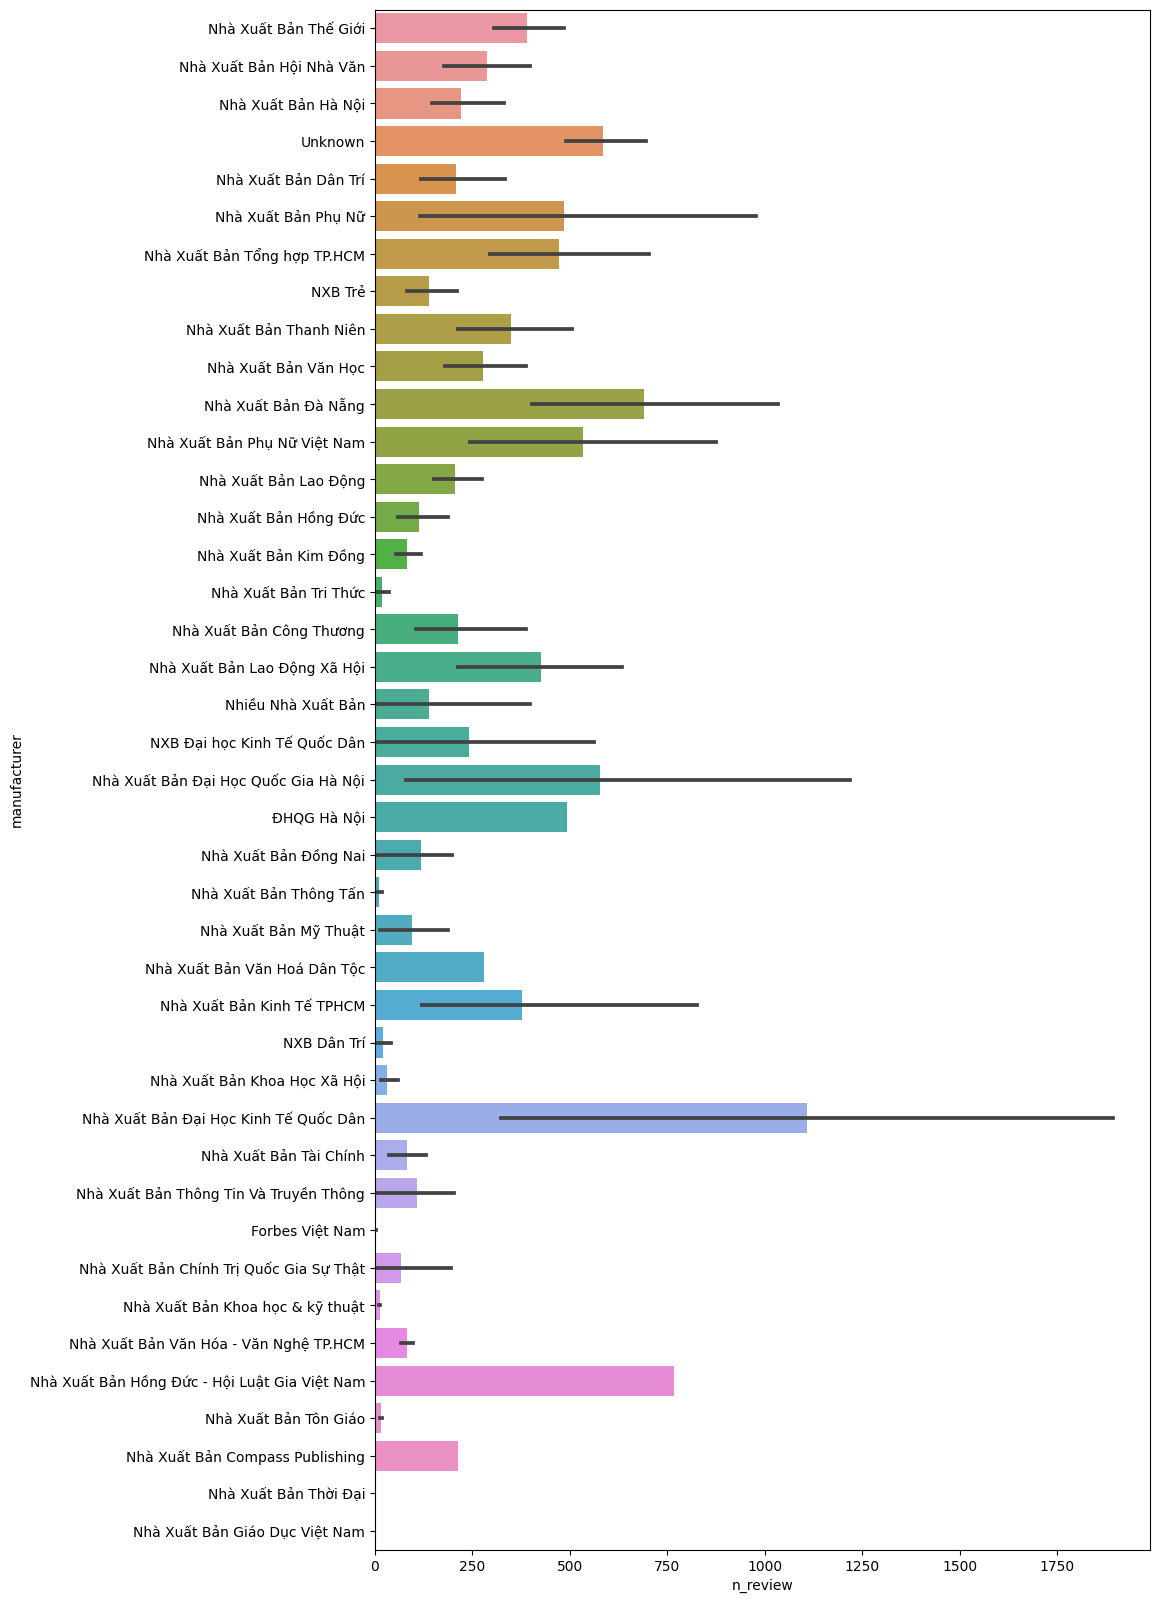

In [64]:
fig, ax = plt.subplots(figsize=(10,20))
sns.barplot(x=df1['n_review'],y=df1['manufacturer'])

**From the bar chart:**
* As expected, the best sellings publisher is also the most reviewed
* The rest are also distrbuted evenly to other big publishers

# Regression Analysis
In this part, i will try to train and test different prediction models to try and predict quantities based on different parameters

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

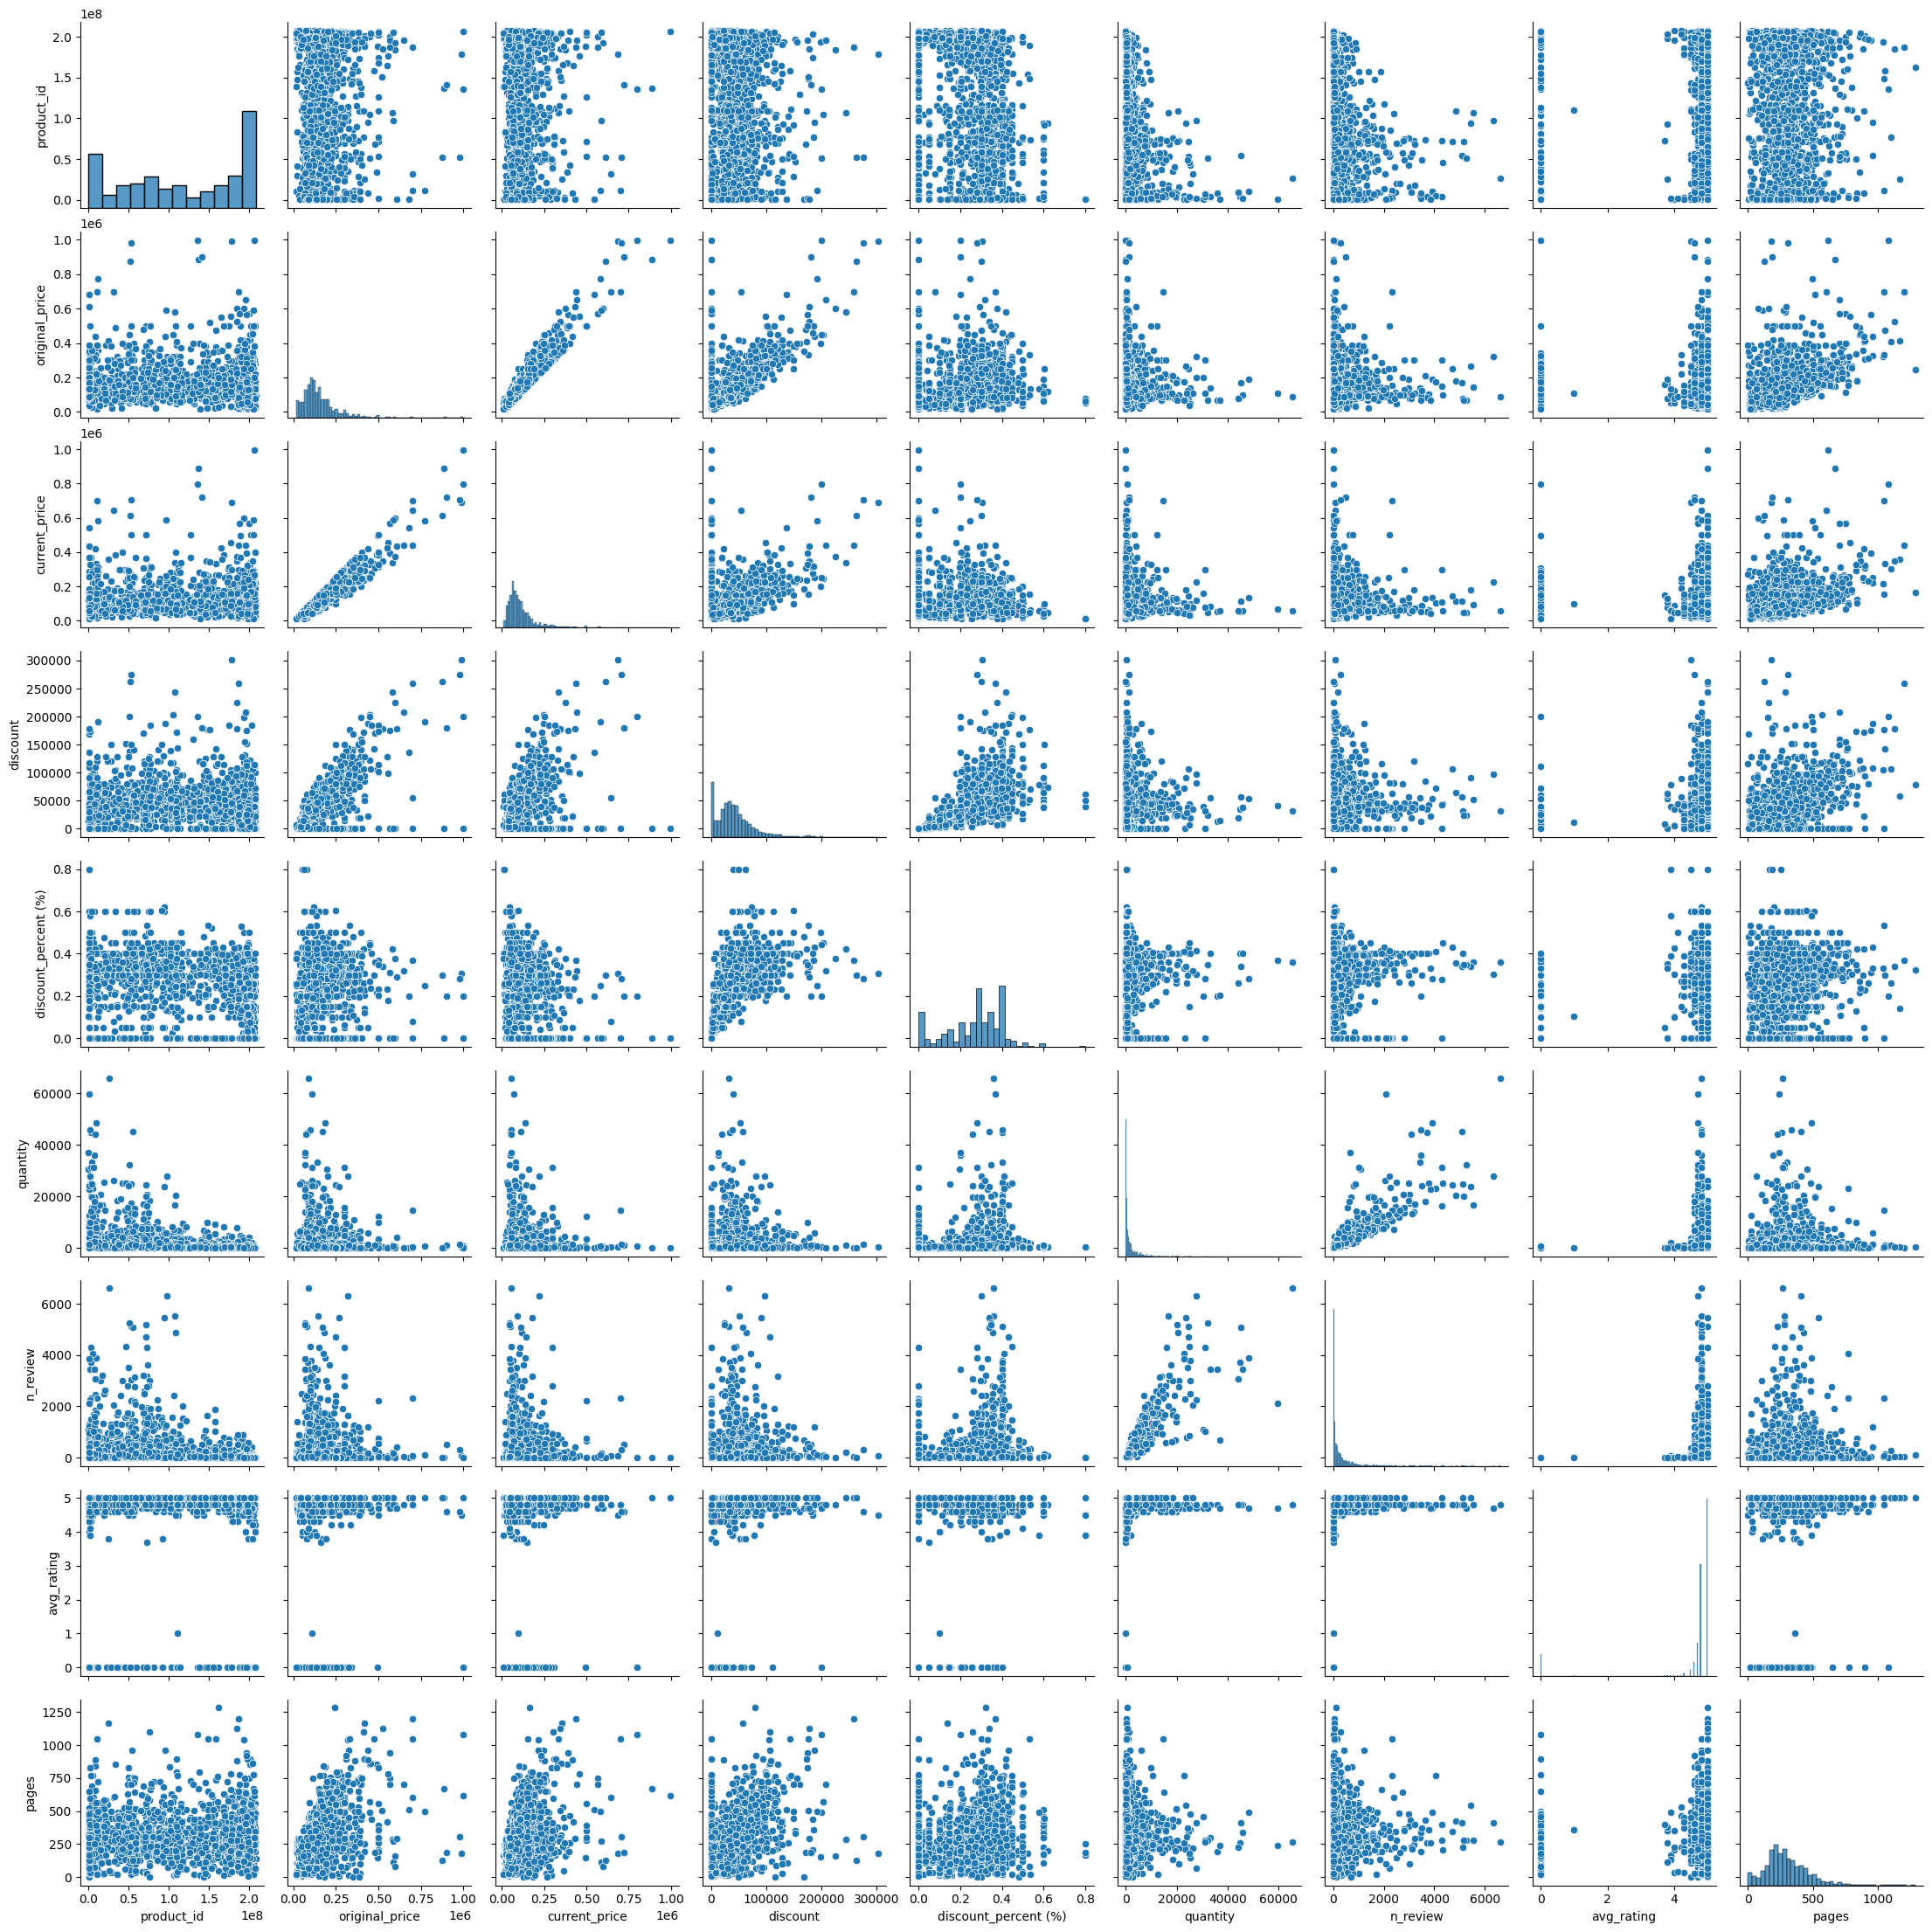

In [67]:
sns.pairplot(df1)

**As stated above:**
* We will use the 3 variables pages, n_review, discount to predict quantity
* First, we will start with univaritate linear regression then multivariate and finally gradient boosting

**Let's now start with linear regression**

**Linear regression with pages:**

In [75]:
ols_data = df1[["quantity", "pages", "n_review", "discount"]]
ols_data.head()

quantity  pages  n_review  discount
1      7929    184       780     26100
2     17896    430      3623     84000
3     24668    228      5131     31600
4     10000    304      1636     54000
5     25272    358      3791     42000

In [76]:
ols_formula = "pages ~ quantity"
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  pages   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.195
Date:                Fri, 16 Aug 2024   Prob (F-statistic):              0.139
Time:                        02:38:26   Log-Likelihood:                -11563.
No. Observations:                1761   AIC:                         2.313e+04
Df Residuals:                    1759   BIC:                         2.314e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    299.2776      4.485     66.725      0.000     290.481     308.075
quantity       0.0012      0.001      1.482      0.139      -0.000       0.003
==============================================================================
Omnibus:                      430.851   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1204.973
Skew:                           1.262   Prob(JB):                    2.21e-262
Kurtosis:                       6.170   Cond. No.                     6.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='pages', ylabel='quantity'>

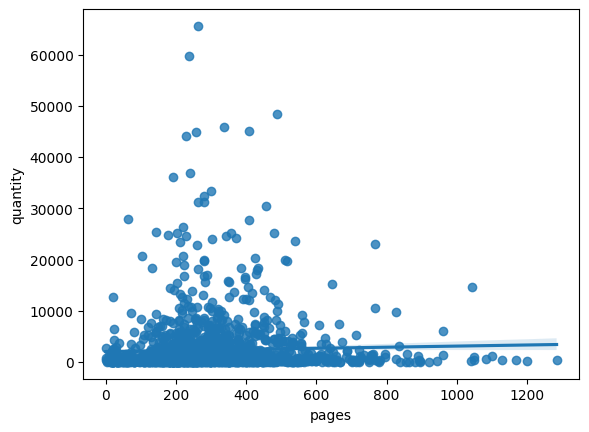

In [77]:
sns.regplot(x = "pages", y = "quantity", data = ols_data)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

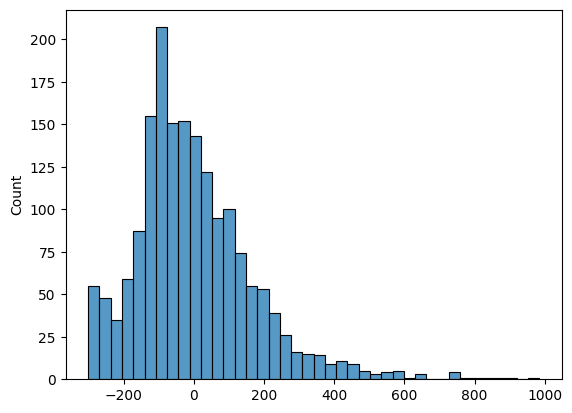

In [78]:
residuals = model.resid
sns.histplot(residuals)

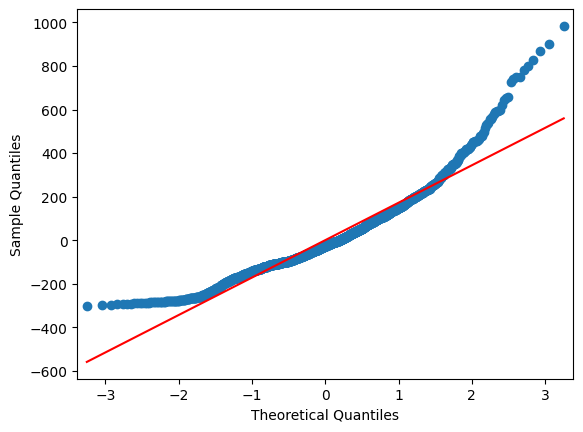

In [79]:
sm.qqplot(residuals, line='s')
plt.show()

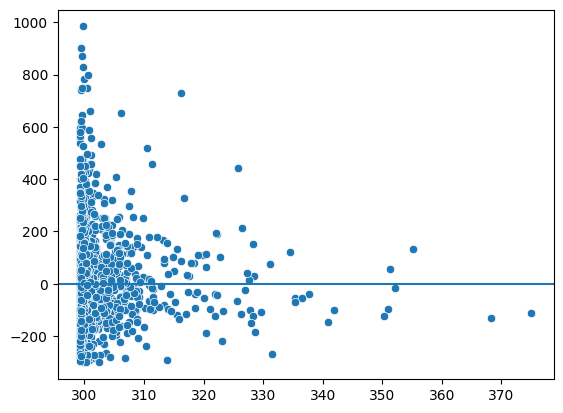

In [80]:
fitted_values = model.predict(ols_data["quantity"])
fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
plt.show()

**Linear regression with n_review**

In [81]:
ols_formula = "n_review ~ quantity"
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               n_review   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     4872.
Date:                Fri, 16 Aug 2024   Prob (F-statistic):               0.00
Time:                        02:38:39   Log-Likelihood:                -12817.
No. Observations:                1761   AIC:                         2.564e+04
Df Residuals:                    1759   BIC:                         2.565e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.7761      9.144      6.647      0.000      42.842      78.710
quantity       0.1108      0.002     69.801      0.000       0.108       0.114
==============================================================================
Omnibus:                      639.078   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           164797.242
Skew:                           0.385   Prob(JB):                         0.00
Kurtosis:                      50.385   Cond. No.                     6.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='n_review', ylabel='quantity'>

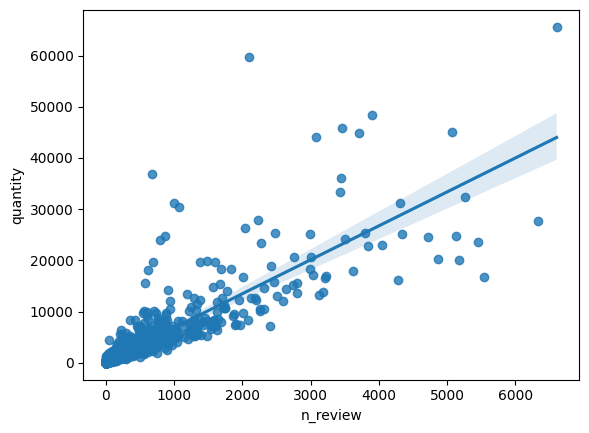

In [82]:
sns.regplot(x = "n_review", y = "quantity", data = ols_data)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

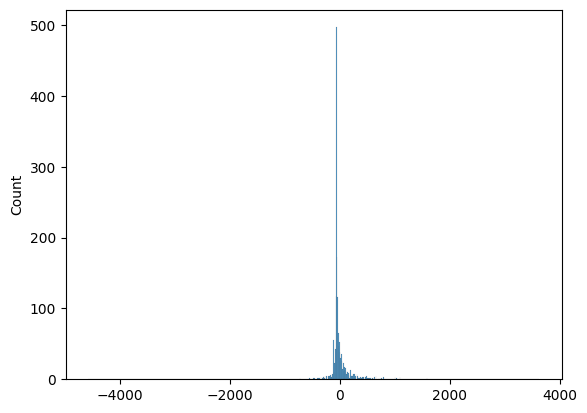

In [83]:
residuals = model.resid
sns.histplot(residuals)

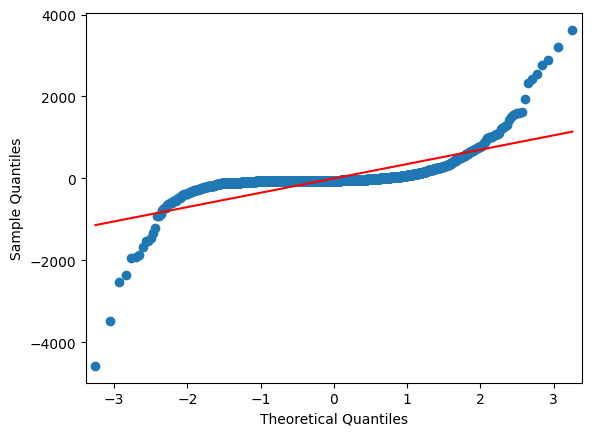

In [84]:
sm.qqplot(residuals, line='s')
plt.show()

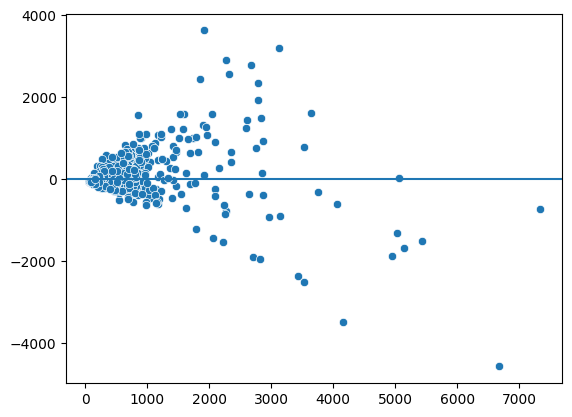

In [85]:
fitted_values = model.predict(ols_data["quantity"])
fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
plt.show()

**Let's now move on to multivariate regression**

In [110]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    ols_data[['n_review', 'pages', 'discount']], ols_data['quantity'], test_size=0.15, random_state=42)

In [111]:
X_train.head()

n_review  pages  discount
815         31    240     74000
588        197    268     38600
1352        33    271     80200
73         724    200     26900
820          2    232     47200

In [112]:
y_train.head()

815      343
588     4329
1352     133
73      4735
820       39
Name: quantity, dtype: int64

In [113]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [114]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [ 6.60982016e+00  4.72374066e-02 -5.37785144e-03]
Mean squared error: 12387644.20
Coefficient of determination: 0.65


**Finally, we will move to gradient boosting**

In [115]:
from sklearn import ensemble
from sklearn.inspection import permutation_importance

In [116]:
X_train, X_test, y_train, y_test = train_test_split(
    df1[['original_price','current_price','discount','discount_percent (%)','n_review','avg_rating','pages']], df1[['quantity']], test_size=0.1, random_state=13
)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [117]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The mean squared error (MSE) on test set: 11703633.8120


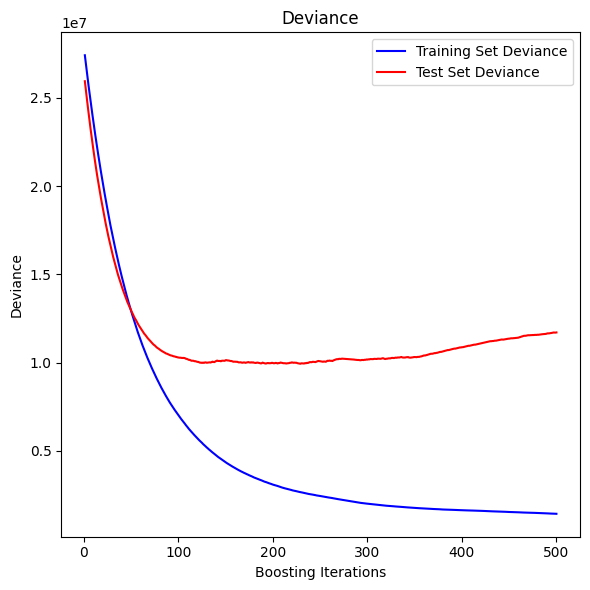

In [118]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()